In [139]:
import FileProcessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import warnings
warnings.filterwarnings("ignore")

In [98]:
file=FileProcessing.FileProcessing()
prediction_df_01 = file.read_input('Prediction_set_Predited_data_0.1')

File Read Complete: c:\Users\neels\Desktop\Capstone\carfollowing\DataDrivenCarFollowing\datadrivencarfollowing-v1\data/Prediction_set_Predited_data_0.1.csv


In [175]:
prediction_df_01.columns

Index(['Vehicle_ID', 'Frame_ID', 'Global_Time', 'Local_X', 'Local_Y',
       'v_length', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceding',
       'Following', 'Space_Headway', 'Time_Headway', 'Location',
       'Preceding_Vehicle_Class', 'Rear_to_Front_Space_Headway',
       'Front_To_Rear_Time_Headway', 'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'v_Class_Name', 'Vehicle_combination', 'preceding_vehicle_length',
       'lane_changes', 'preceding_Vehicle_Velocity',
       'preceding_Vehicle_Acceleration', 'preceding_car_lane_changes',
       'preceding_Local_Y', 'preceding_v_Class', 'jerk', 'total_pair_duration',
       'pair_Time_Duration', 'total_pair_dur', 'nextframeAcc', 'nextframesvel',
       'nextframeposition', 'nextframejerk', 'nextFrameSpacing',
       'precnextframeposition', 'precnextframesvel',
       'knn_predicted_acceleration', 'knn_predicted_velocity',
       'knn_predicted_Local_Y', 'knn_predic

In [176]:
prediction_df_01["Pair Time Duration"] = prediction_df_01["pair_Time_Duration"]
prediction_df_01["Actual Velocity"] = prediction_df_01["nextframesvel"]
prediction_df_01["Actual Acceleration"] = prediction_df_01["nextframeAcc"]
prediction_df_01["Actual Jerk"] = prediction_df_01["nextframejerk"]
prediction_df_01["Actual Spacing"] = prediction_df_01["nextFrameSpacing"]

In [100]:
def selectpair(pair):
    LF = prediction_df_01[prediction_df_01["L-F_Pair"] == pair]
    return LF

# Velocity prediction plots for reaction time 0.1sec

In [200]:
def plot(df,title):
      #fig1, ax = plt.subplots()
      plt.figure(figsize=(15, 9))
      plt.title(title,color = "green", size = 18)
      plt.xlabel("Time Duration in seconds", color = "green", size = 18)
      plt.ylabel("Velocity", color = "green", size = 18)
      plt.rc('xtick', labelsize=15)
      plt.rc('ytick', labelsize=15)
      sns.lineplot(x = df["Pair Time Duration"],y= df['Actual Velocity'],color="black",label = "Actual Velocity")
      ax=sns.lineplot(x = df["Pair Time Duration"],y= df['rf_predicted_velocity'],color="b",label = "rf_predicted_velocity")
      ax=sns.lineplot(x = df["Pair Time Duration"],y= df['knn_predicted_velocity'],color="orange",label = "knn_predicted_velocity")
      ax=sns.lineplot(x = df["Pair Time Duration"],y= df['cnn_predicted_velocity'],color="purple",label = "cnn_predicted_velocity")

      #for line, name in zip(ax.lines, df[['Actual Velocity','rf_predicted_velocity','knn_predicted_acceleration','cnn_predicted_acceleration']].columns):
       #     y = line.get_ydata()[-50]
        #    ax.annotate(name, xy=(0.949, y), xytext=(6, 0),
         #               color=line.get_color(), xycoords=ax.get_yaxis_transform(),
          #              textcoords="offset points", size=15, va = "center")

      #ax.get_legend ().remove ()
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.tick_params(left = False, bottom = False)
      return plt

In [181]:
LF1 = selectpair('2322-2330')
LF2 = selectpair('551-560')
LF3 = selectpair('1304-1309')
LF4 = selectpair('3084-3094')
LF5 = selectpair('439-444')
LF6 = selectpair('2695-2725')
LF7 = selectpair('2725-2717')
LF8 = selectpair('1635-1642')
LF9 = selectpair('2785-2804')

## Velocity plots for the combinations 'Car-Heavy Vehicle', 'Car-Car'

<module 'matplotlib.pyplot' from 'c:\\Users\\neels\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

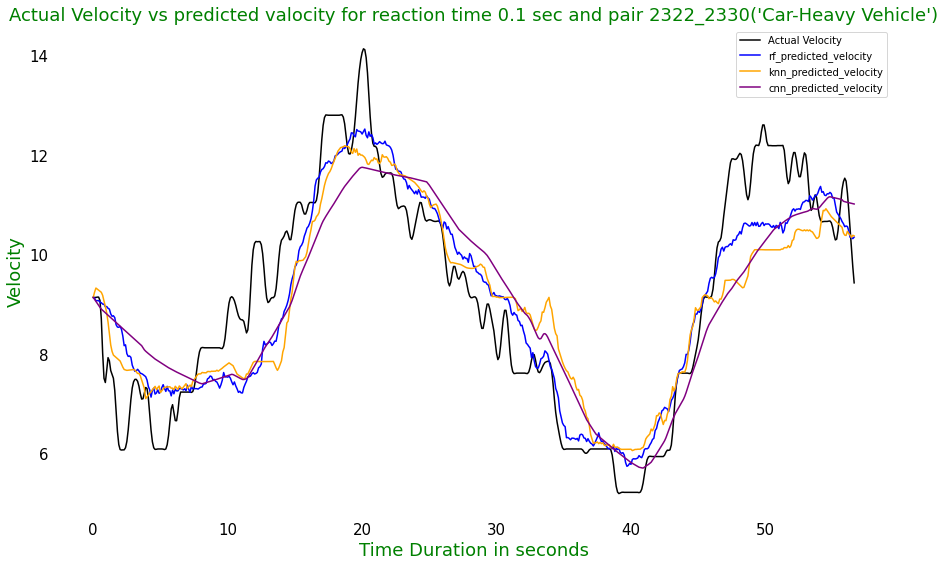

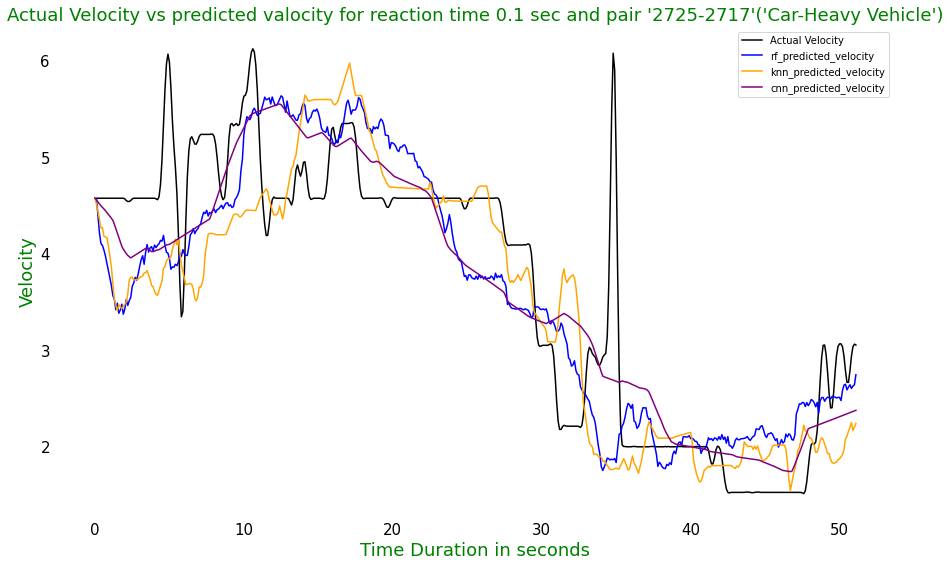

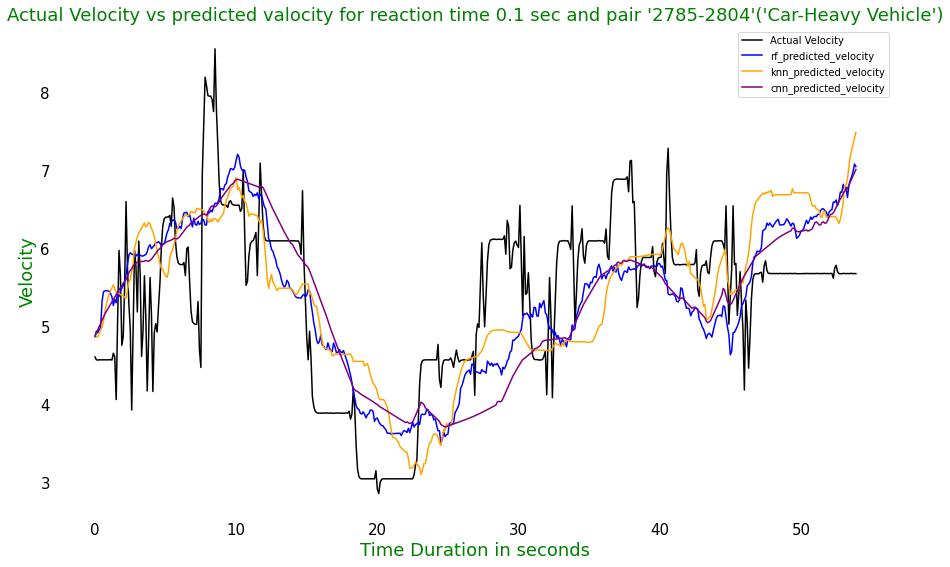

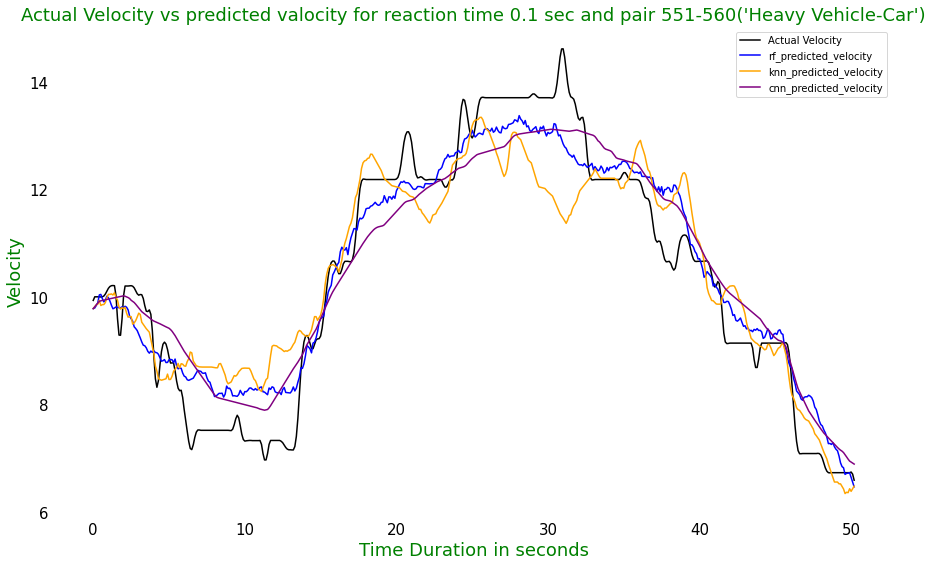

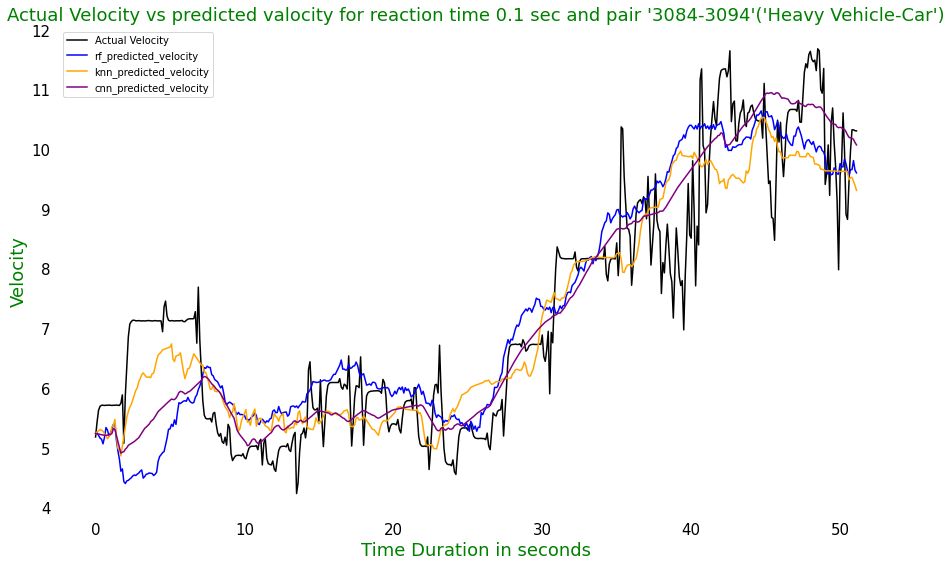

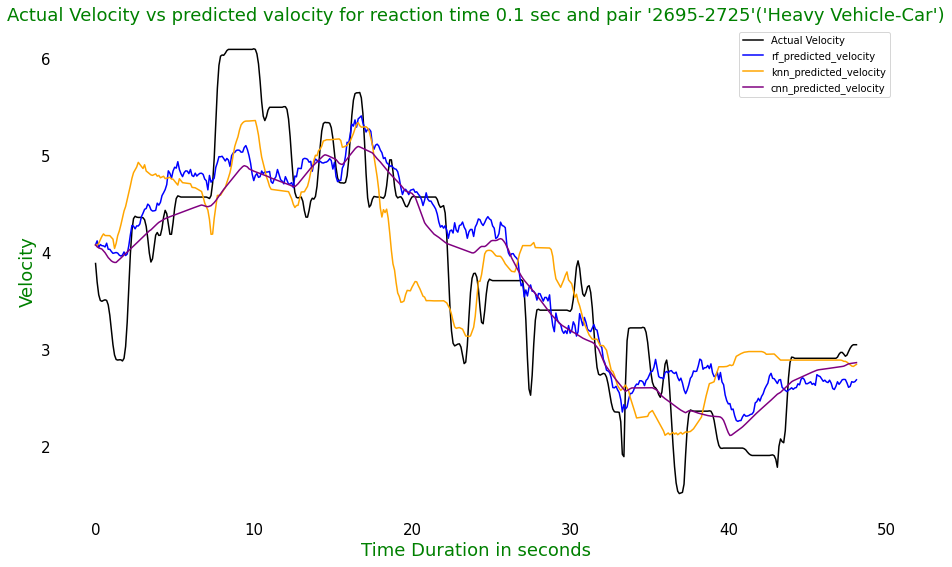

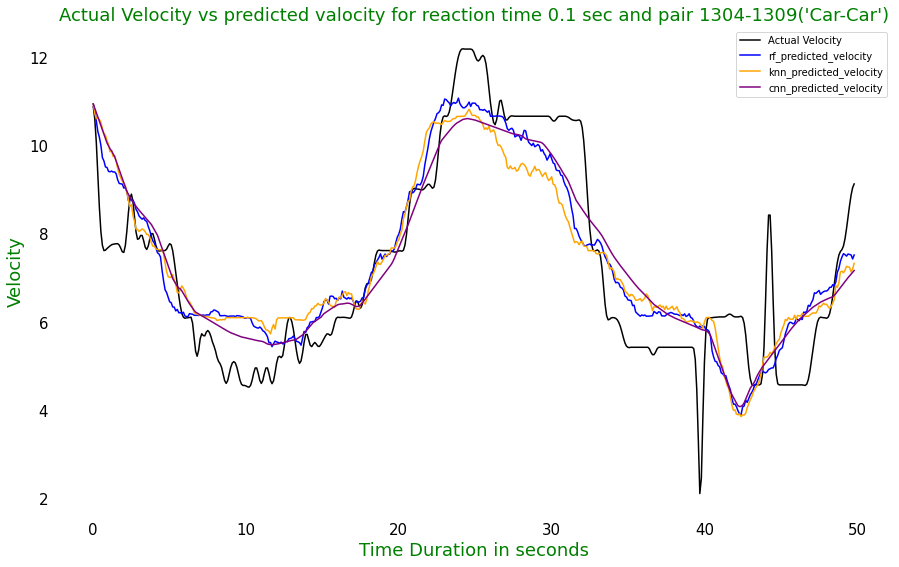

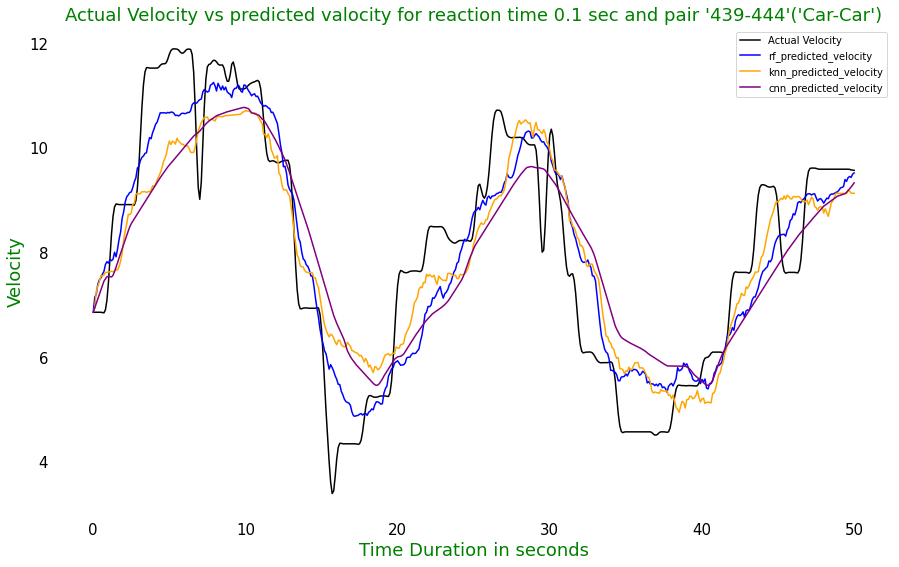

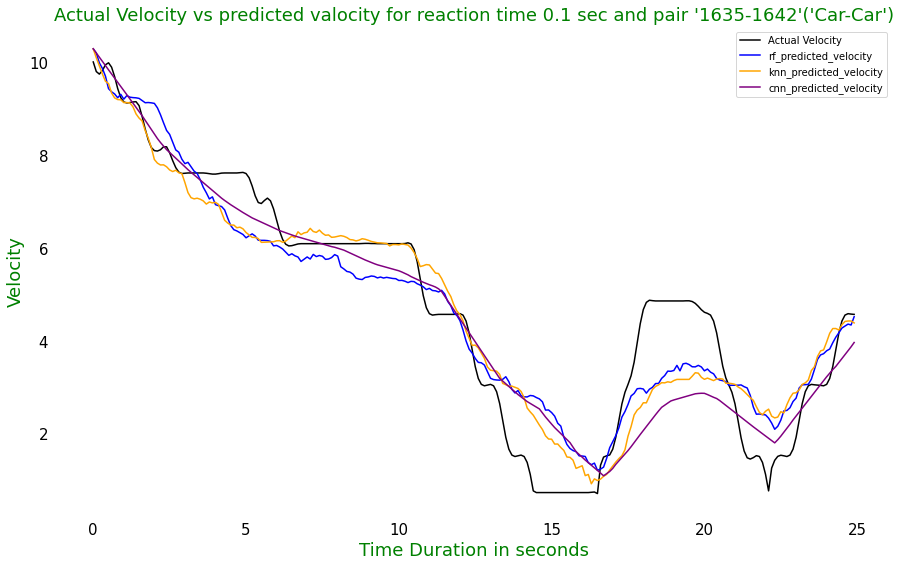

In [201]:
plot(LF1,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")
plot(LF7,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair '2725-2717'('Car-Heavy Vehicle')")
plot(LF9,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair '2785-2804'('Car-Heavy Vehicle')")
plot(LF2,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair 551-560('Heavy Vehicle-Car')")
plot(LF4,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair '3084-3094'('Heavy Vehicle-Car')")
plot(LF6,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair '2695-2725'('Heavy Vehicle-Car')")
plot(LF3,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair 1304-1309('Car-Car')")
plot(LF5,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair '439-444'('Car-Car')")
plot(LF8,"Actual Velocity vs predicted valocity for reaction time 0.1 sec and pair '1635-1642'('Car-Car')")

## Spacing prediction plots for reation time 0.1 sec

In [183]:
def space(df,title):
      #fig1, ax = plt.subplots()
      plt.figure(figsize=(15, 9))
      plt.title(title,color = "green", size = 18)
      plt.xlabel("Time Duration", color = "green", size = 18)
      plt.ylabel("Velocity", color = "green", size = 18)
      plt.rc('xtick', labelsize=15)
      plt.rc('ytick', labelsize=15)
      sns.lineplot(x = df["Pair Time Duration"],y= df['Actual Spacing'],color="black",label = "Actual Velocity")
      ax=sns.lineplot(x = df["Pair Time Duration"],y= df['rf_predicted_spacing'],color="b",label = "rf_predicted_spacing")
      ax=sns.lineplot(x = df["Pair Time Duration"],y= df['knn_predicted_spacing'],color="orange",label = "knn_predicted_spacing")
      ax=sns.lineplot(x = df["Pair Time Duration"],y= df['cnn_predicted_spacing'],color="purple",label = "cnn_predicted_spacing")
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.tick_params(left = False, bottom = False)
      return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\neels\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

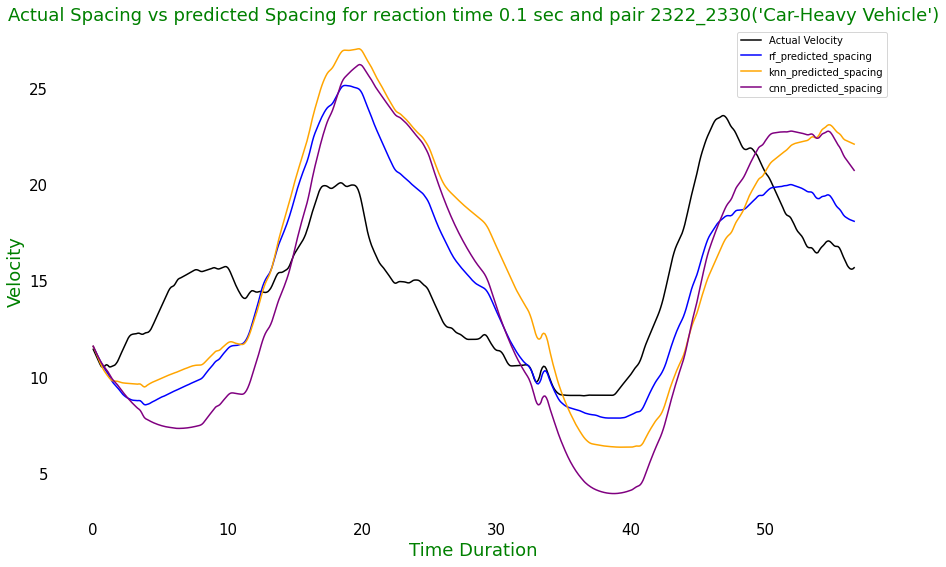

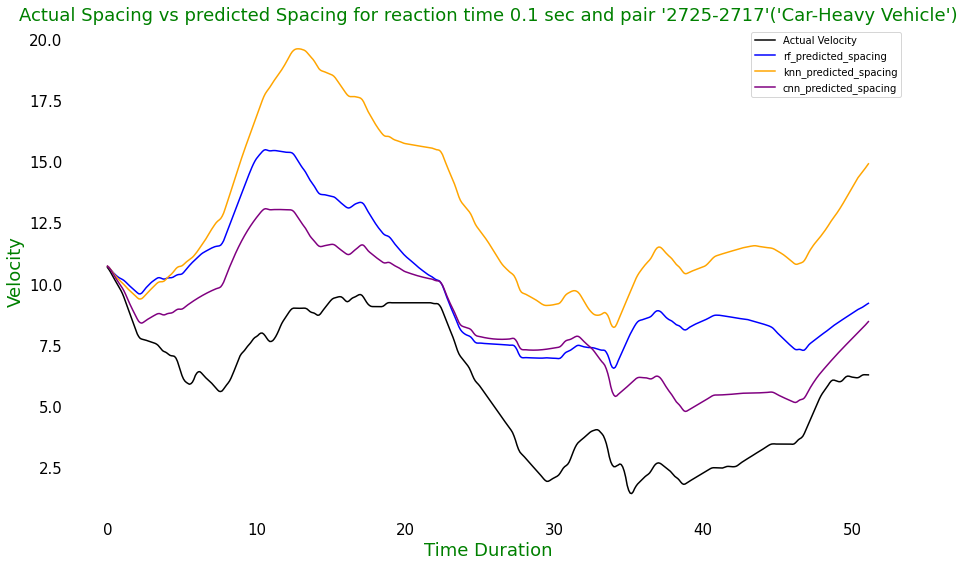

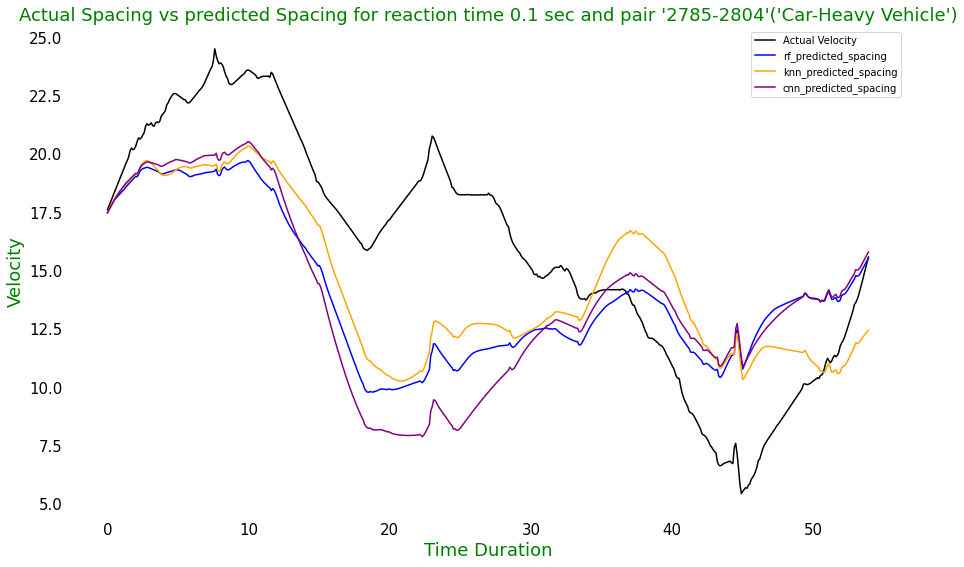

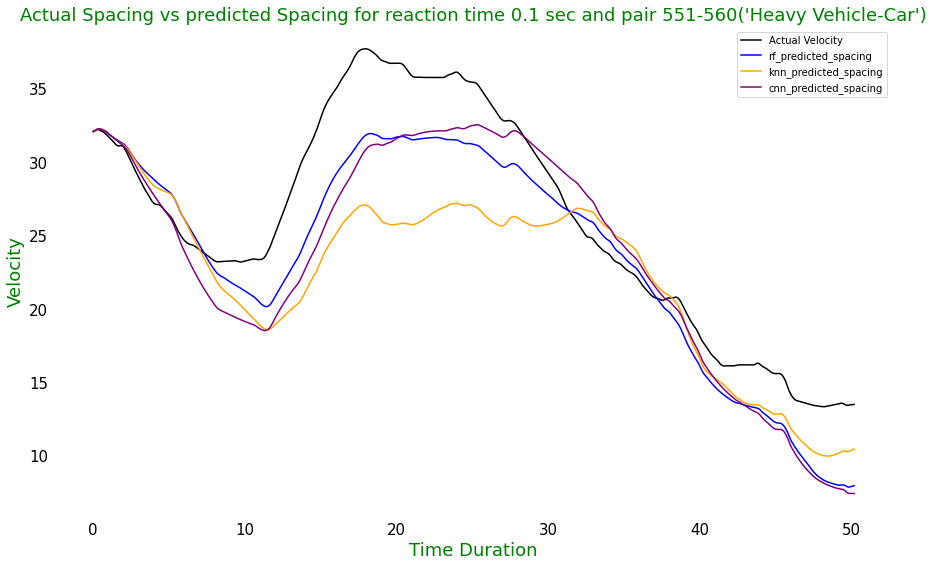

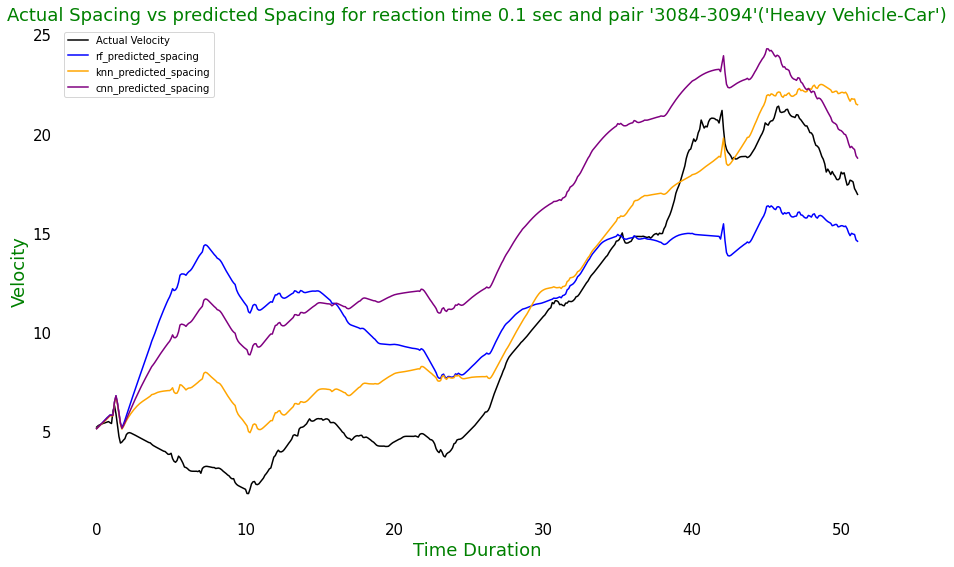

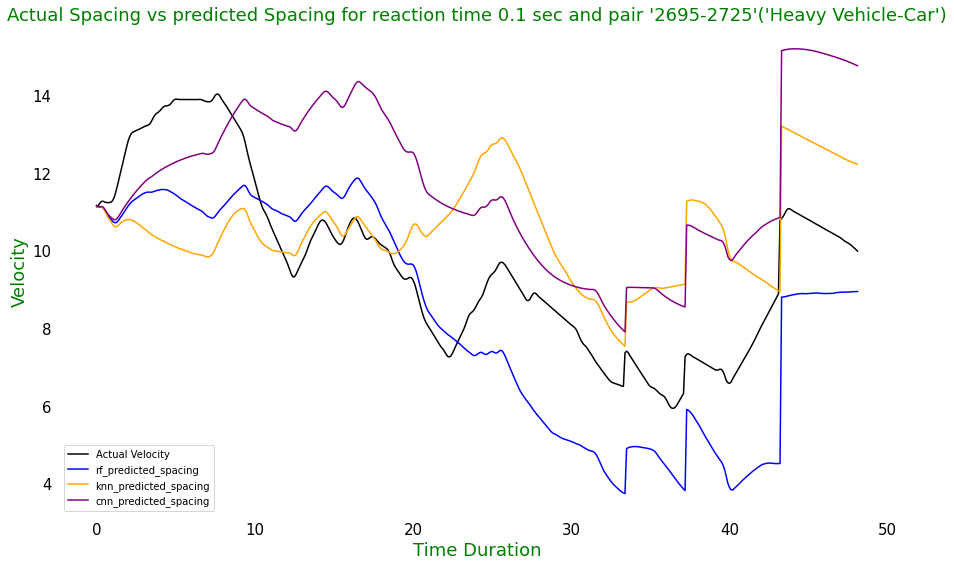

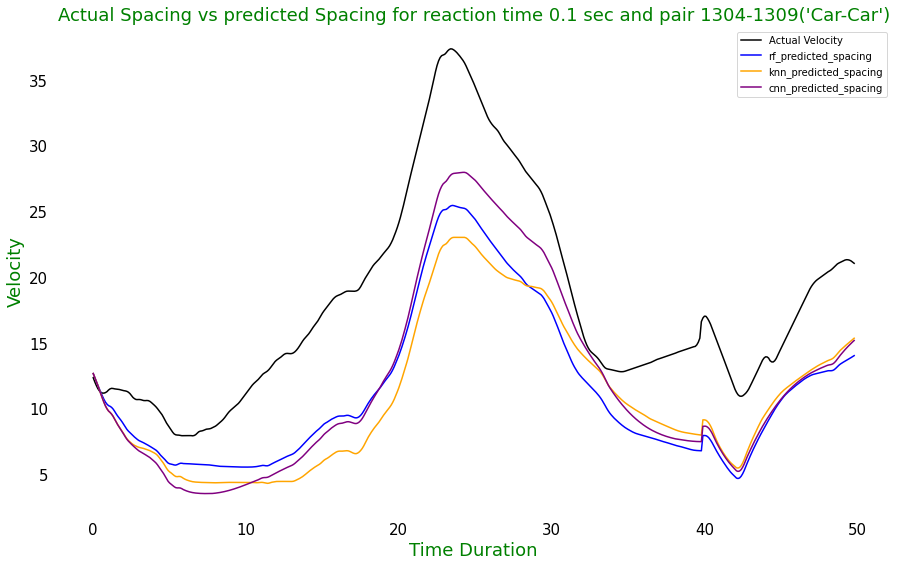

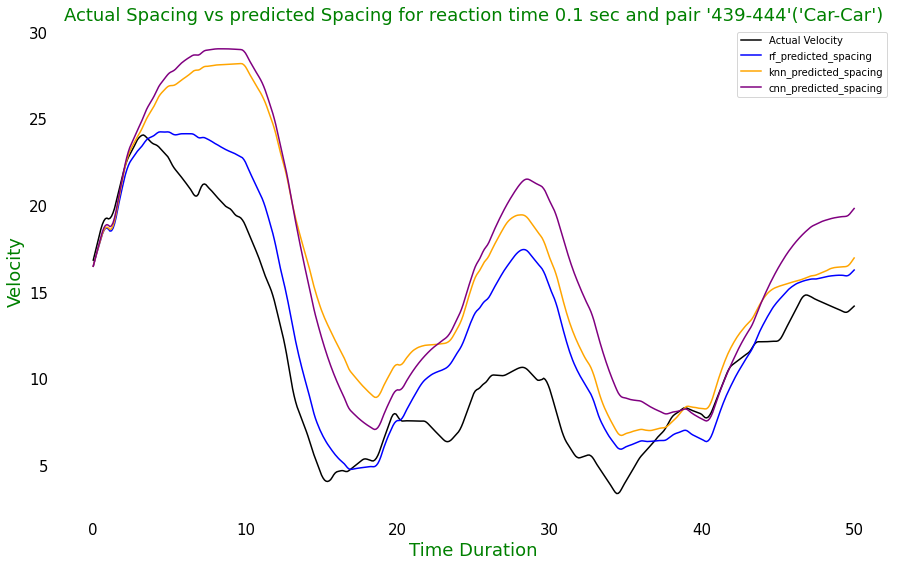

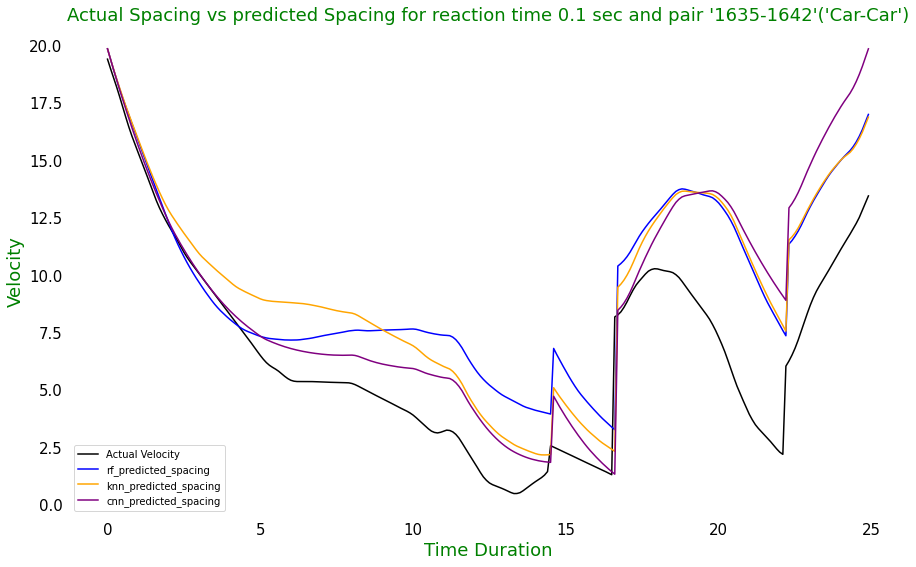

In [182]:
space(LF1,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")
space(LF7,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair '2725-2717'('Car-Heavy Vehicle')")
space(LF9,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair '2785-2804'('Car-Heavy Vehicle')")
space(LF2,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair 551-560('Heavy Vehicle-Car')")
space(LF4,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair '3084-3094'('Heavy Vehicle-Car')")
space(LF6,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair '2695-2725'('Heavy Vehicle-Car')")
space(LF3,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair 1304-1309('Car-Car')")
space(LF5,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair '439-444'('Car-Car')")
space(LF8,"Actual Spacing vs predicted Spacing for reaction time 0.1 sec and pair '1635-1642'('Car-Car')")

## Prediced Acceleration plots for reation time 0.1

In [203]:
def acceleration(df,actual,prediction,title):
      #fig1, ax = plt.subplots()
      plt.figure(figsize=(15, 9))
      plt.title(title, color = "green", size = 18)
      plt.xlabel("Time Duration in seconds", color = "green", size = 18)
      plt.ylabel("Acceleration", color = "green", size = 18)
      sns.lineplot(x = df["pair_Time_Duration"],y= df[actual],color="black")
      ax=sns.lineplot(x = df["pair_Time_Duration"],y= df[prediction],color="b")
      #ax=sns.lineplot(x = LF1["pair_Time_Duration"],y= LF1['knn_predicted_acceleration'],color="pink")
      #ax=sns.lineplot(x = LF1["pair_Time_Duration"],y= LF1['cnn_predicted_acceleration'],color="black")
      #ax=sns.lineplot(x = LF1["pair_Time_Duration"],y= LF1['nextframesvel'],color="b")

      for line, name in zip(ax.lines, df[[actual,prediction]].columns):
            y = line.get_ydata()[-1]
            ax.annotate(name, xy=(0.949, y), xytext=(6, 0),
                        color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                        textcoords="offset points", size=15, va = "center")

      #ax.get_legend ().remove ()
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.tick_params(left = False, bottom = False)
      return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\neels\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

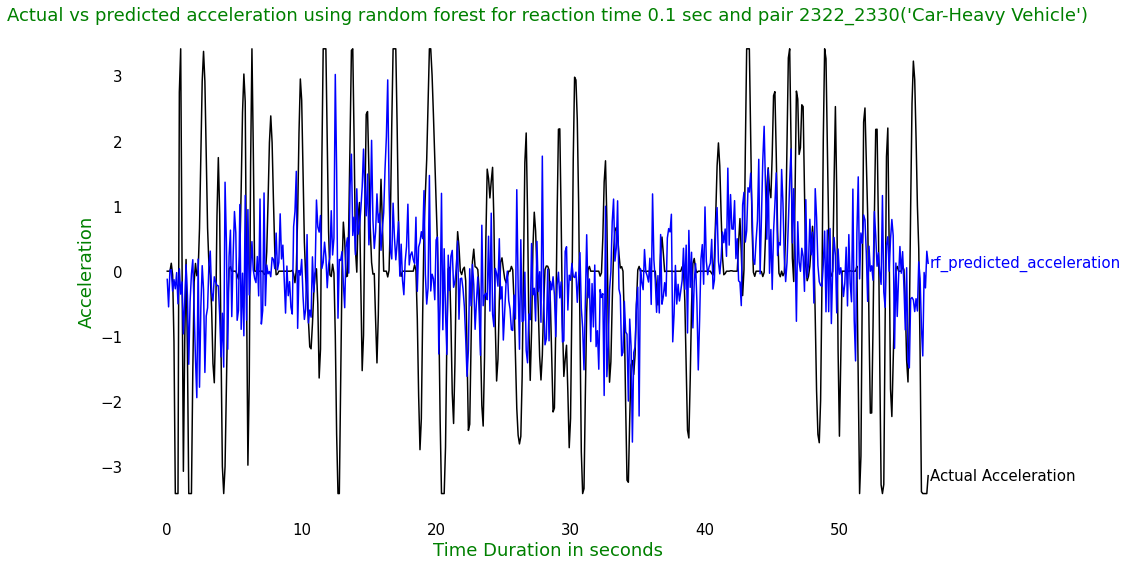

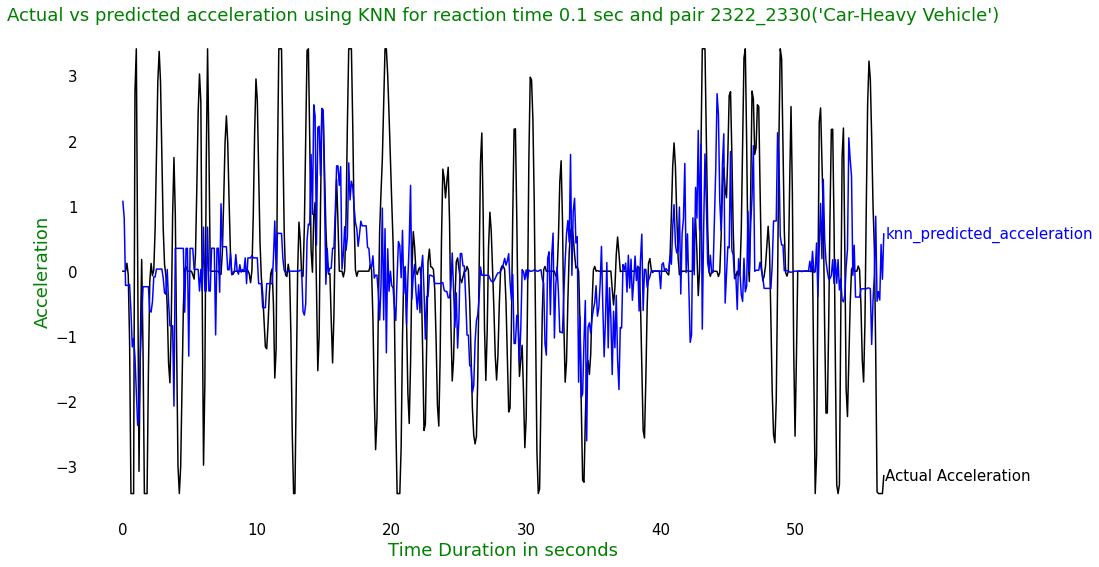

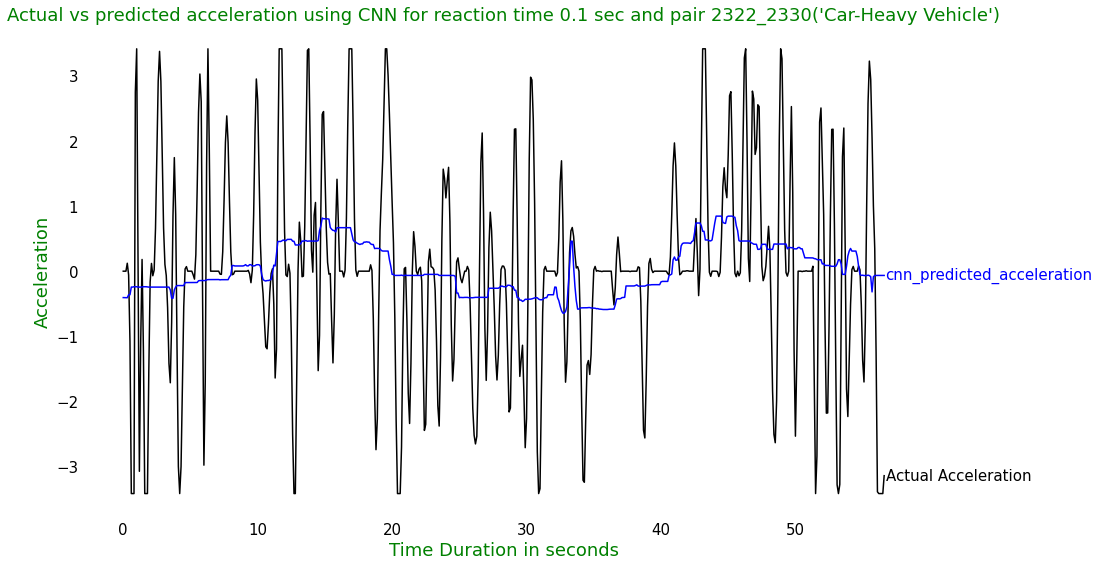

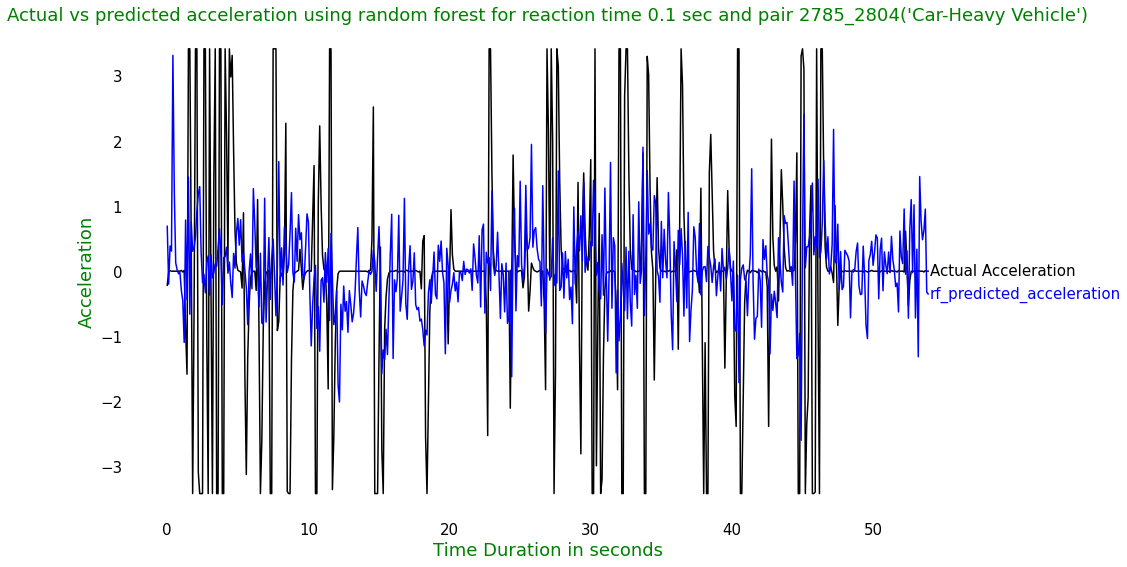

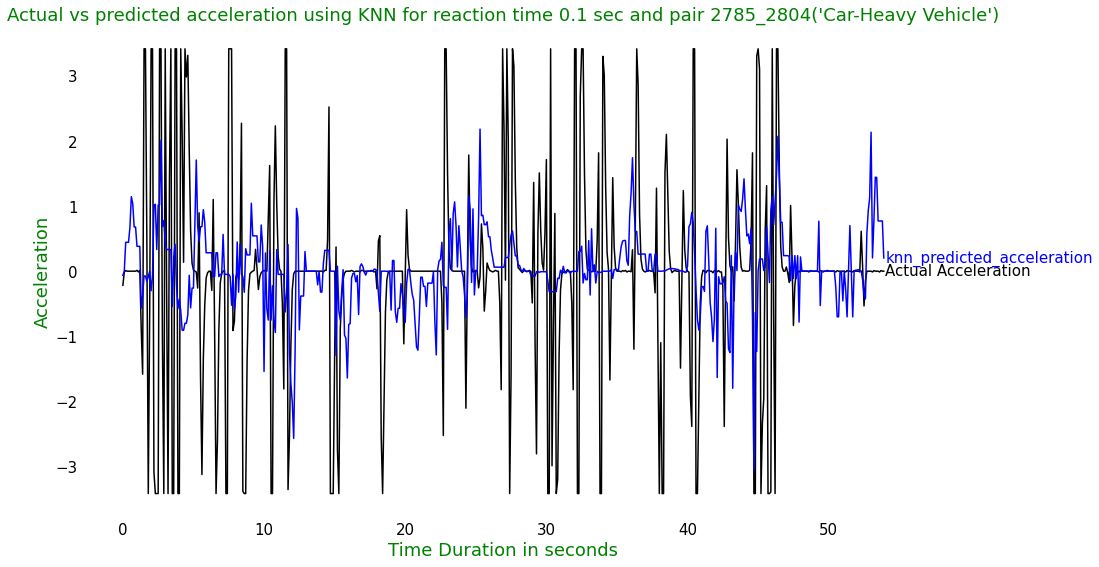

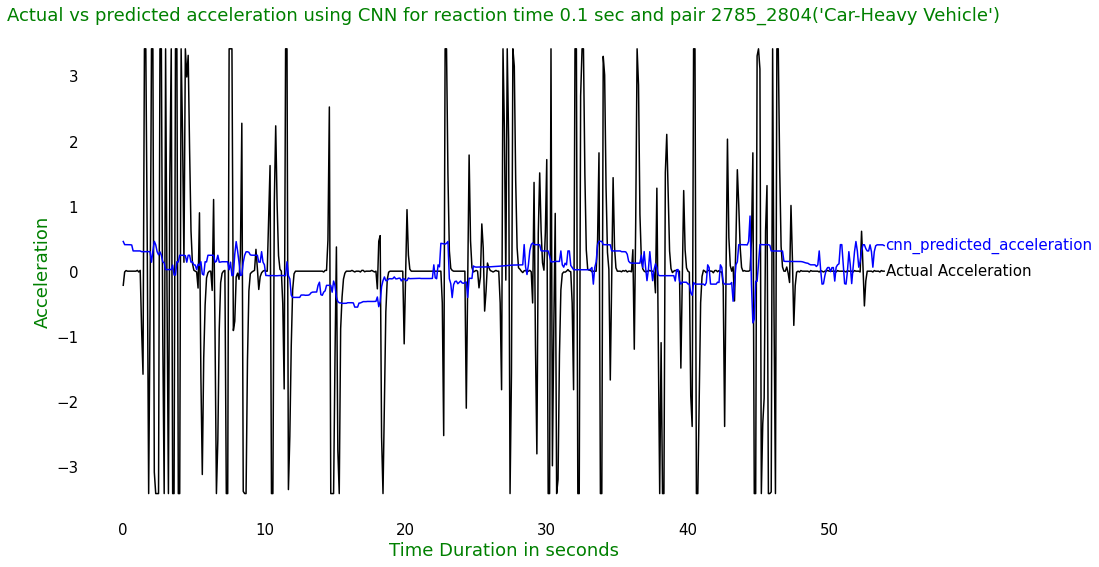

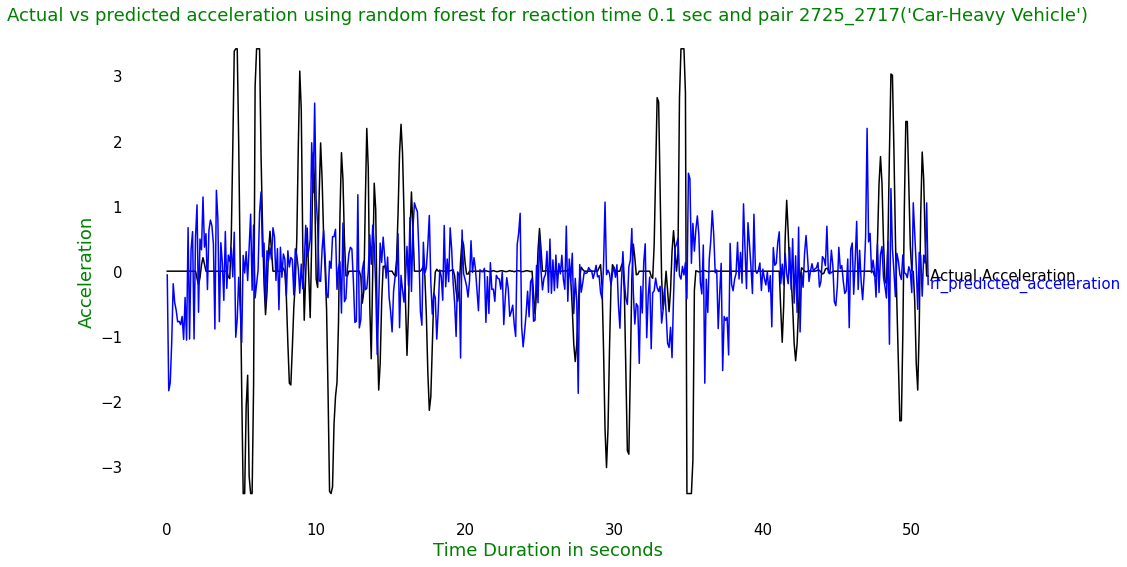

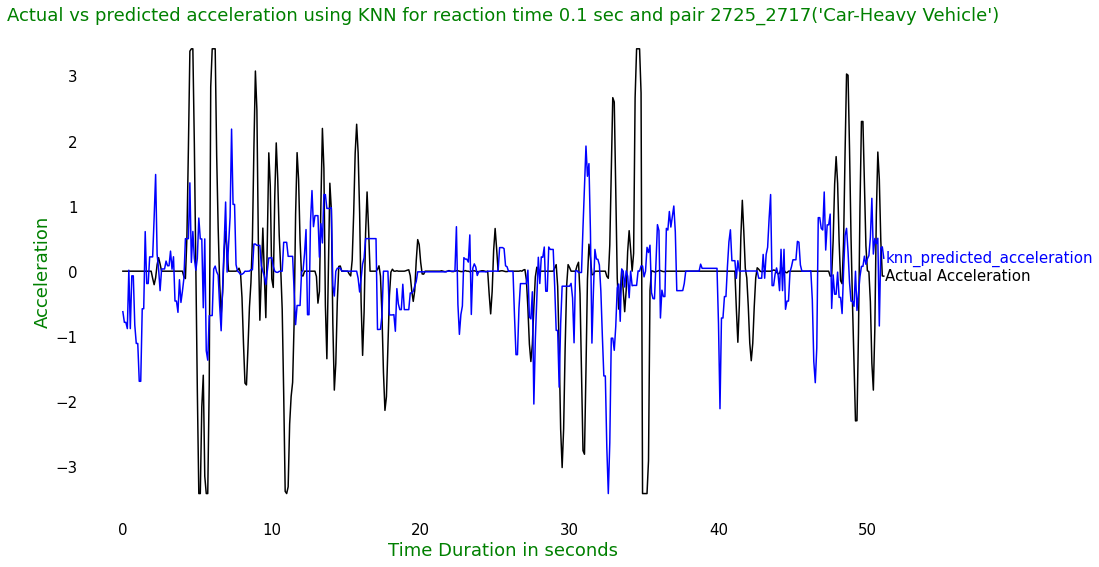

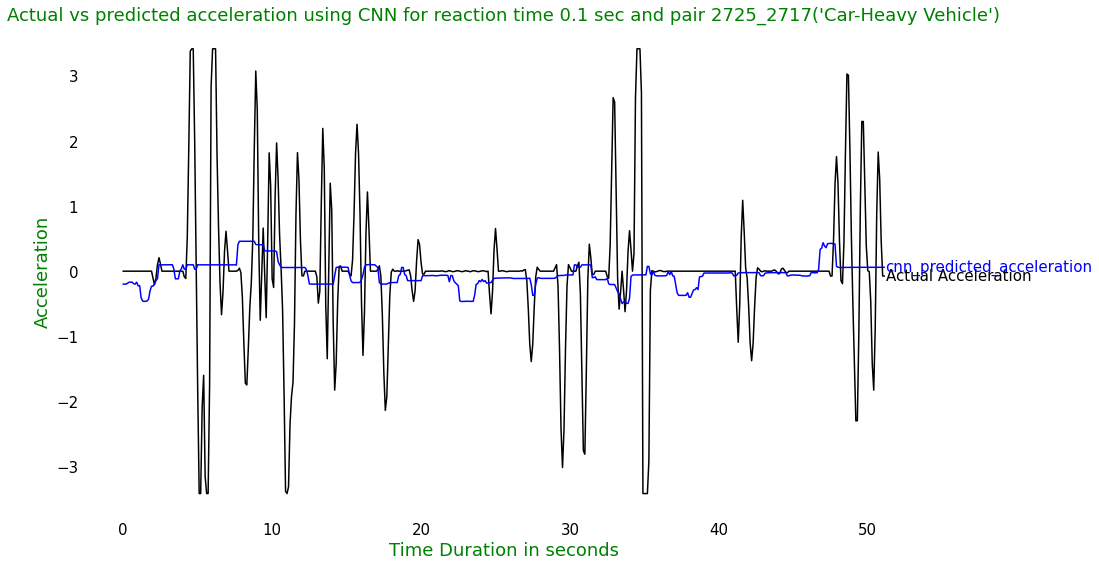

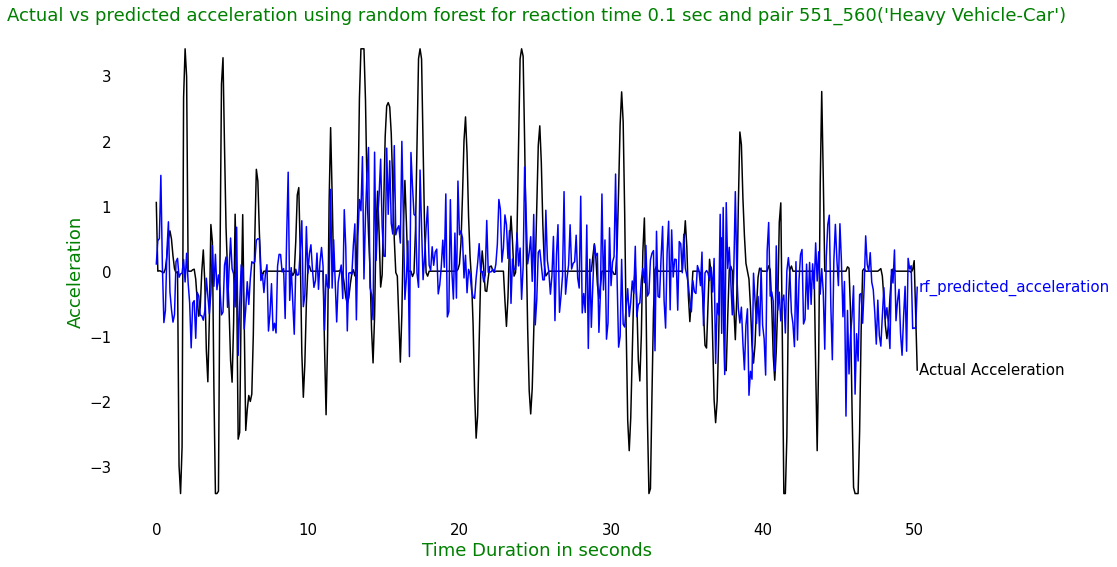

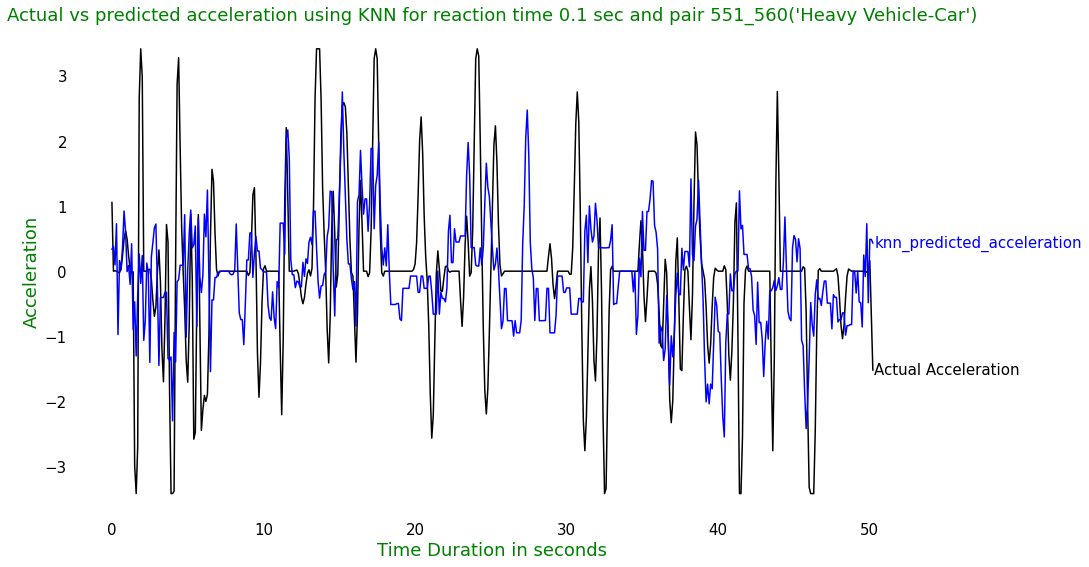

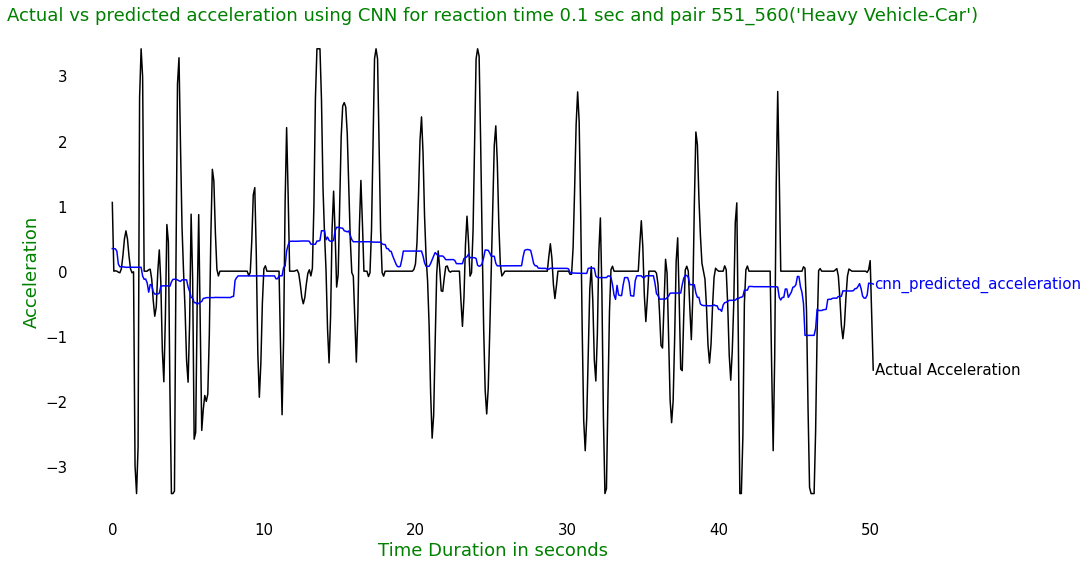

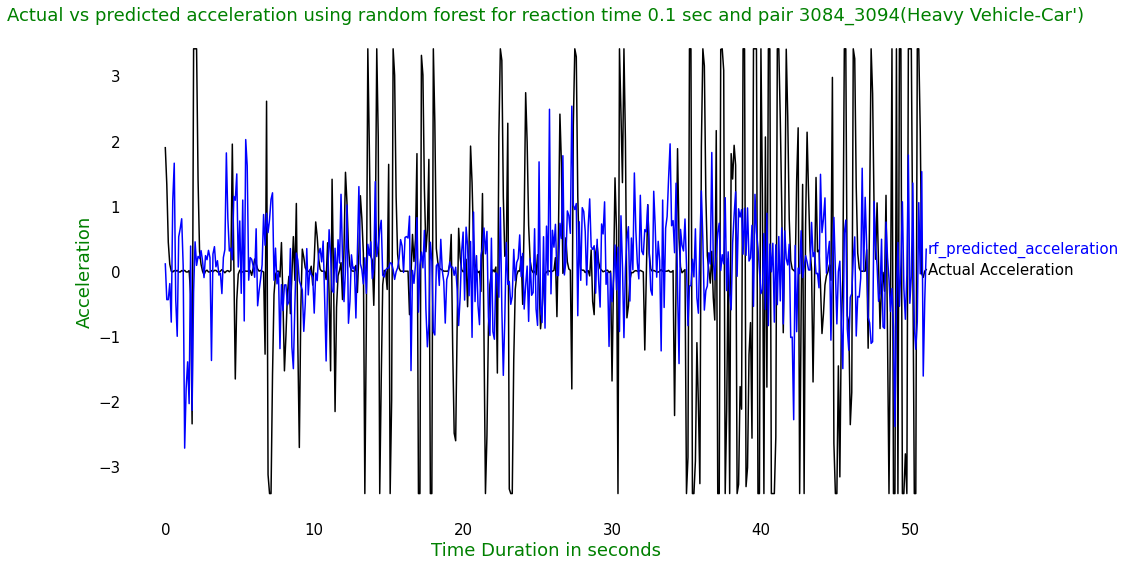

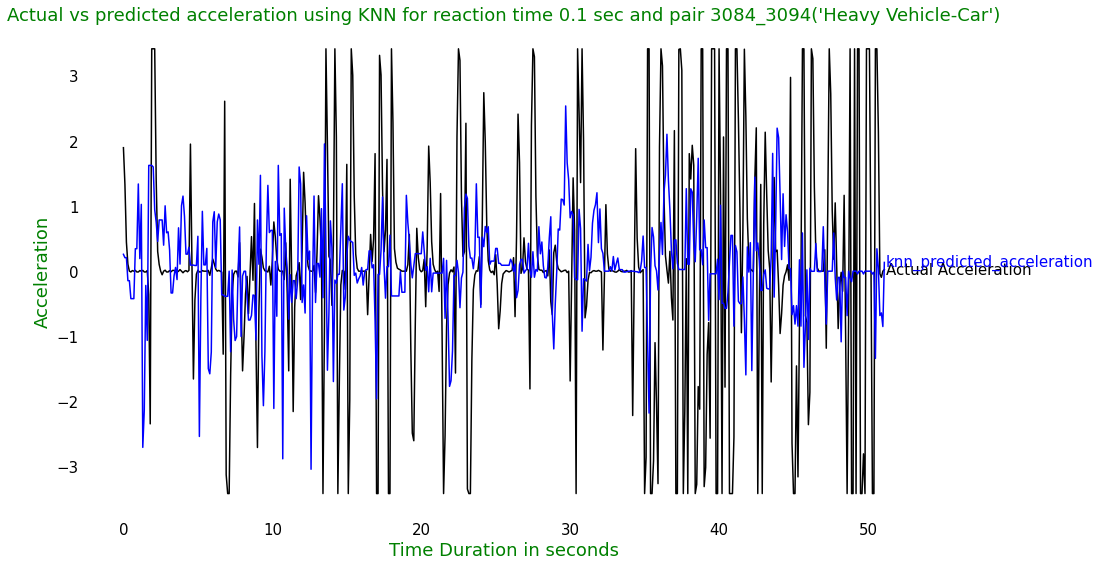

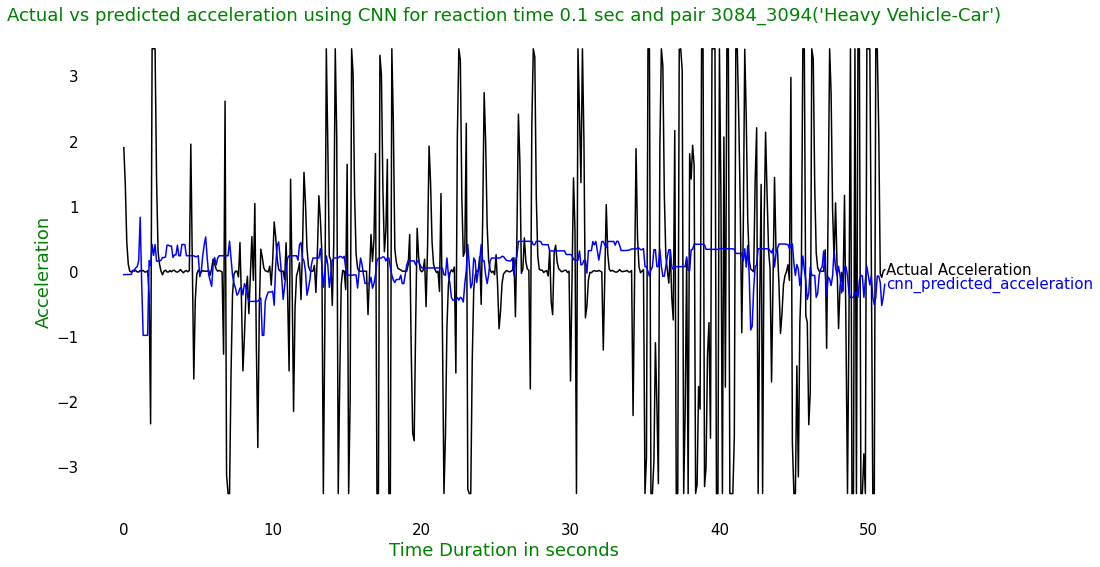

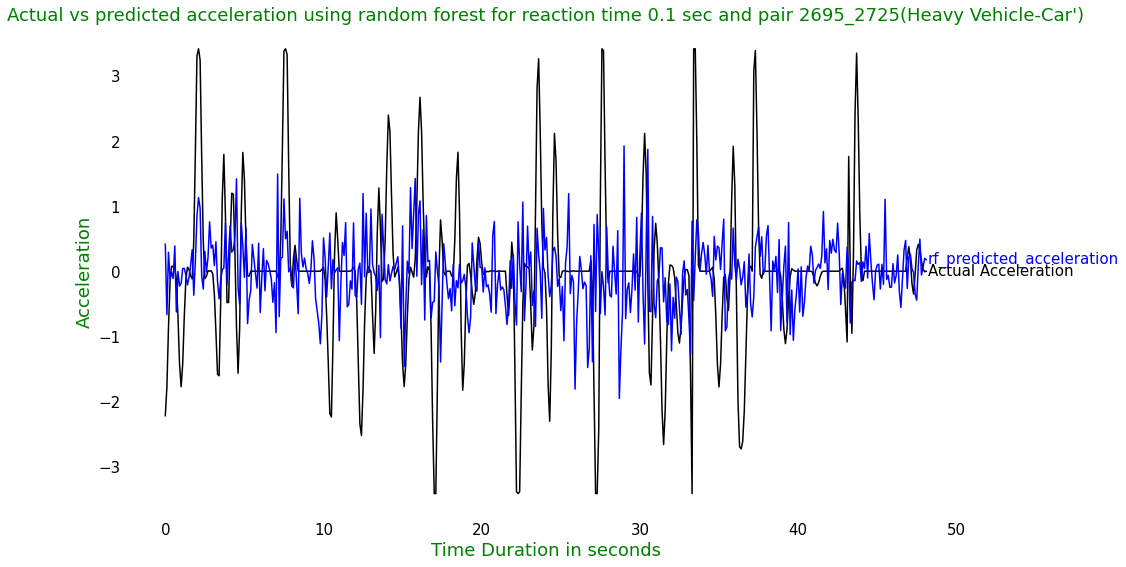

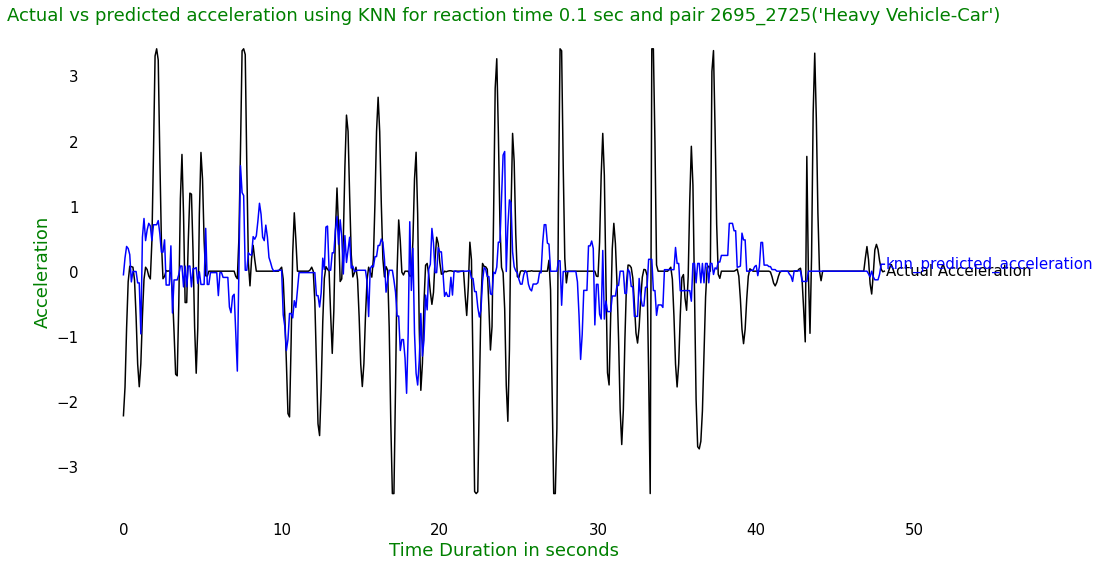

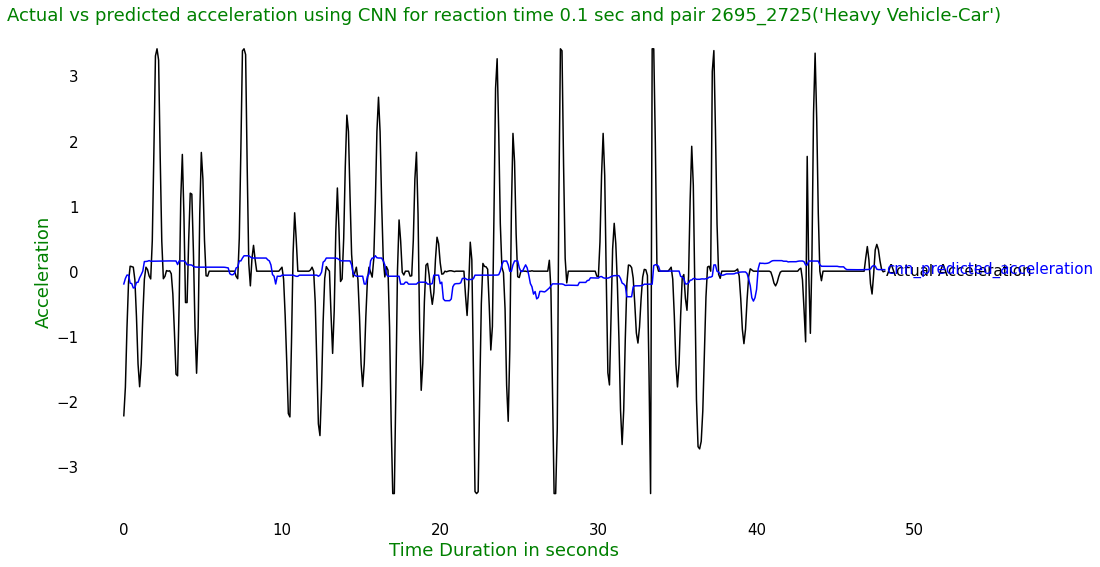

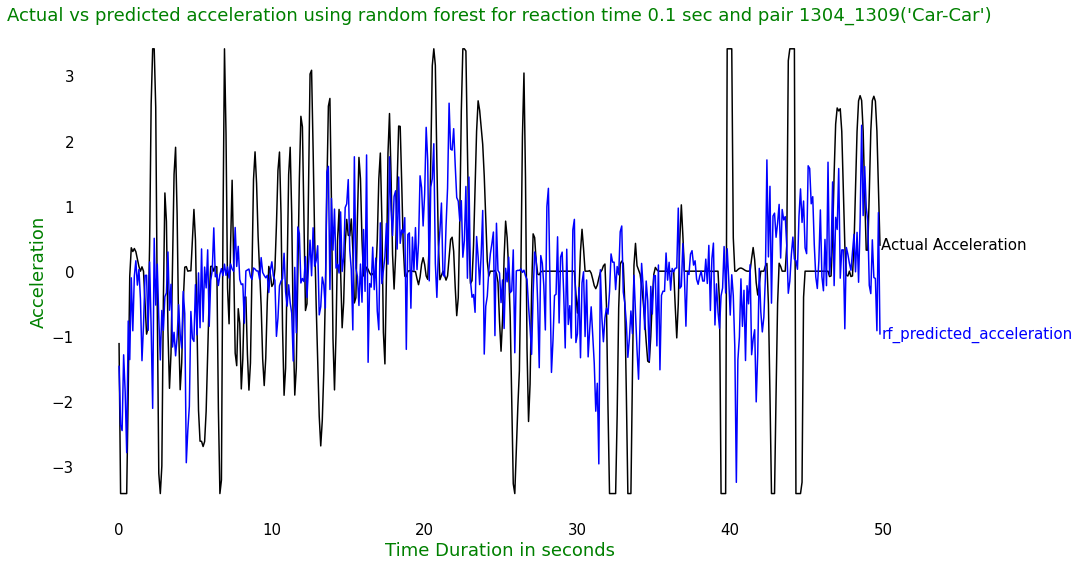

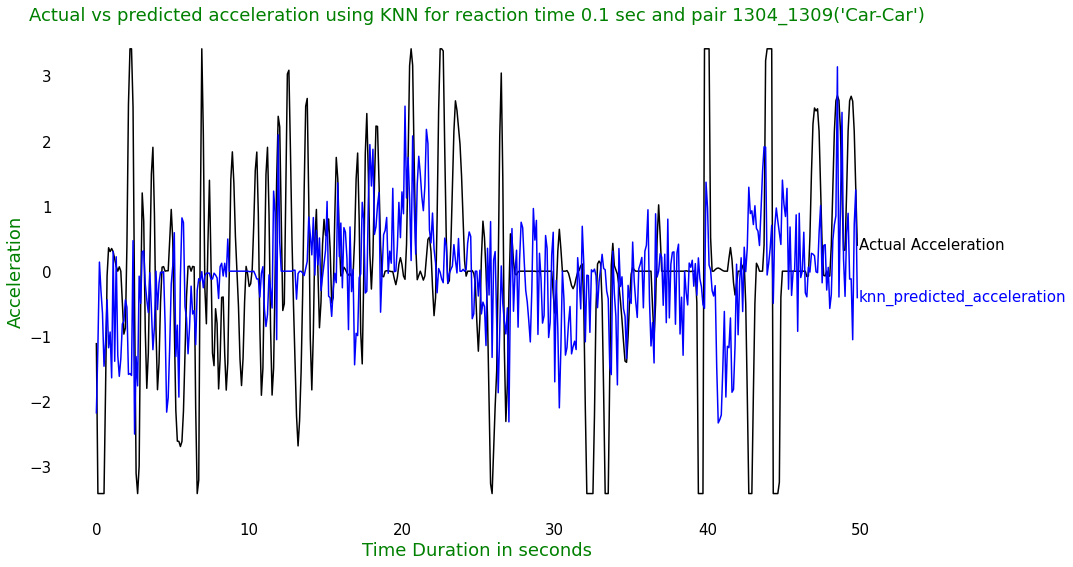

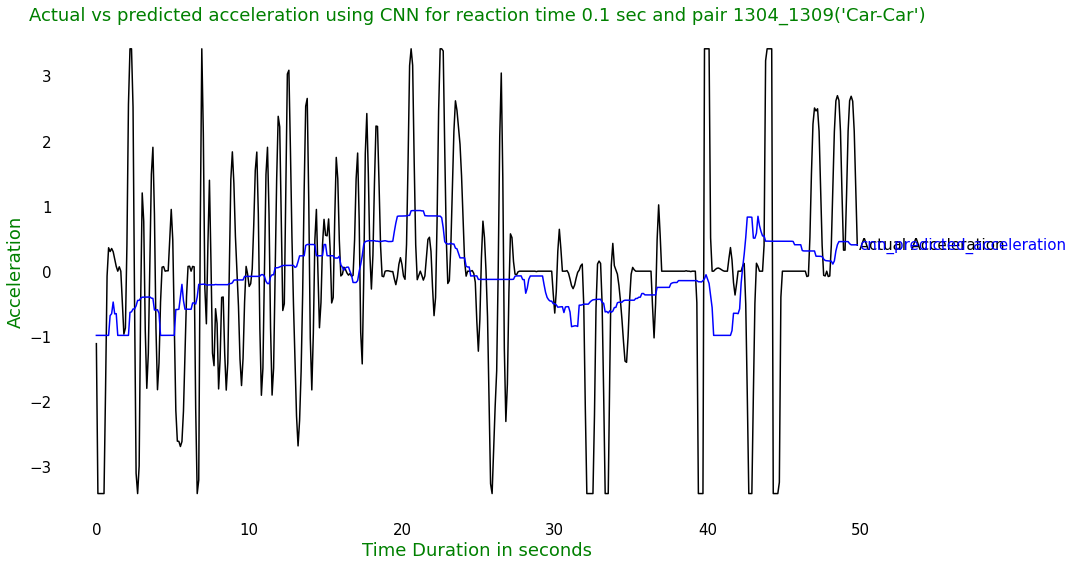

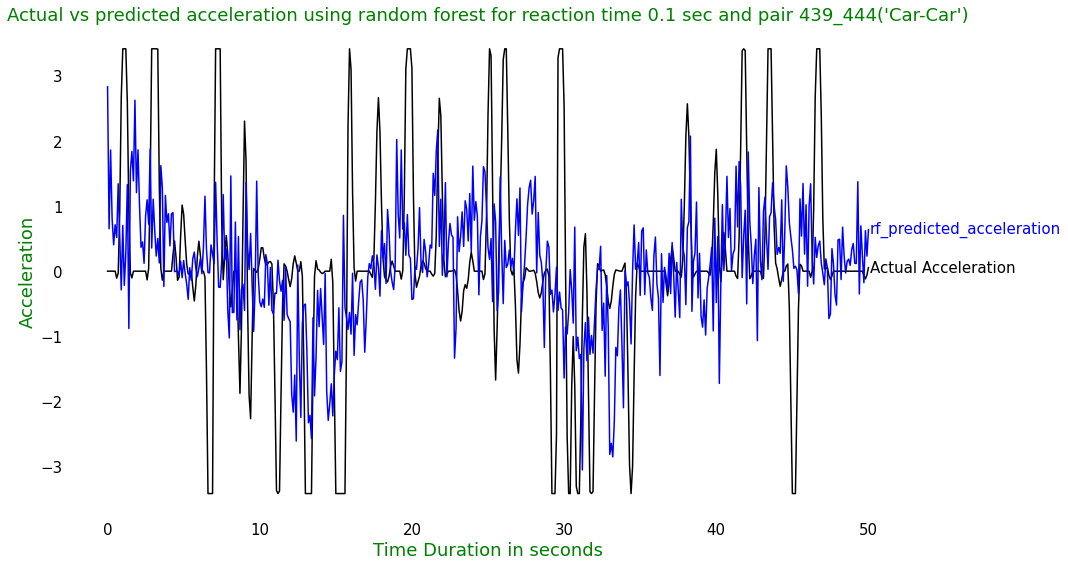

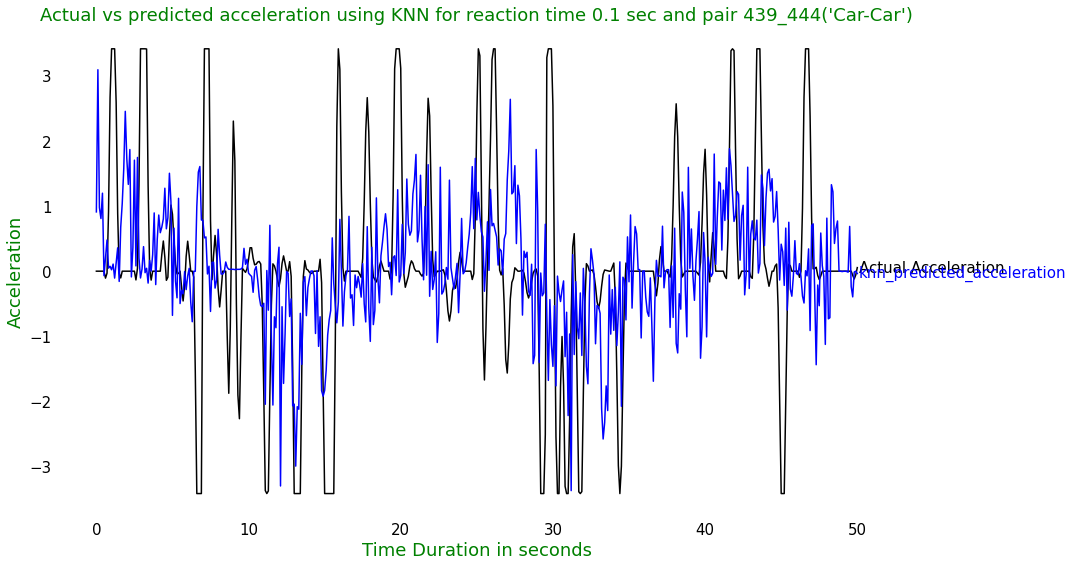

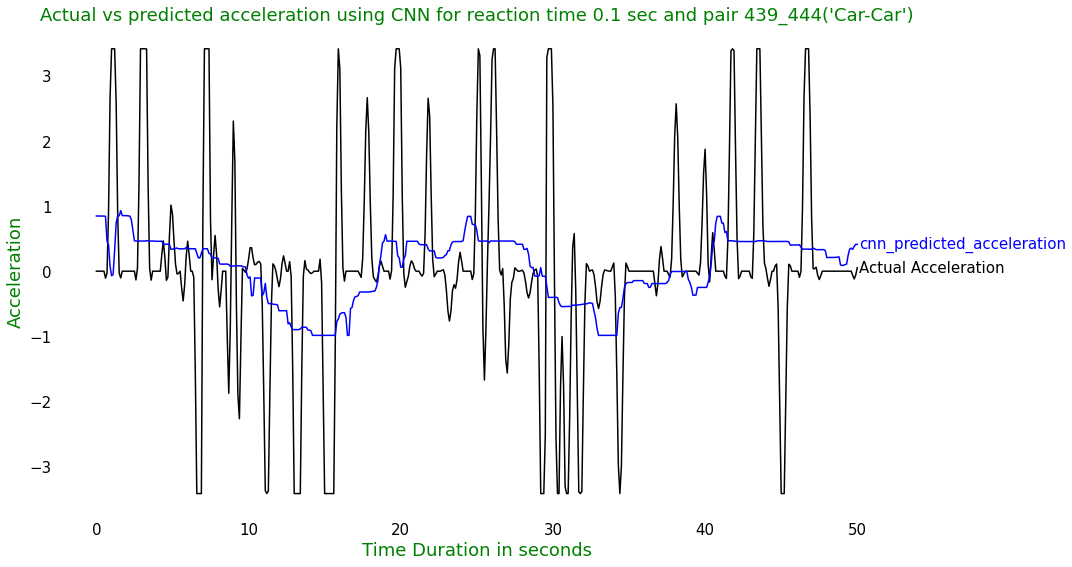

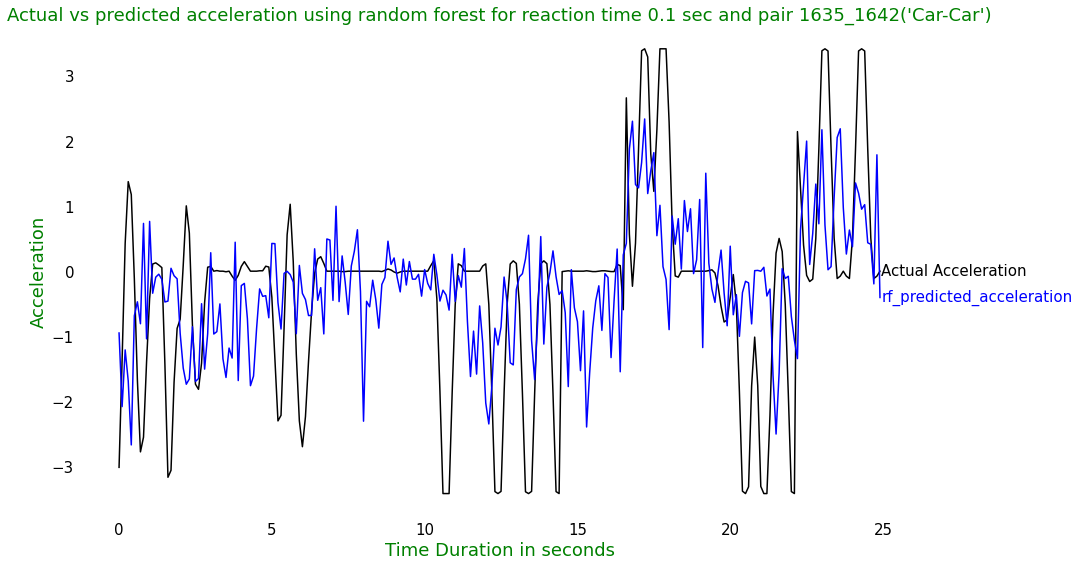

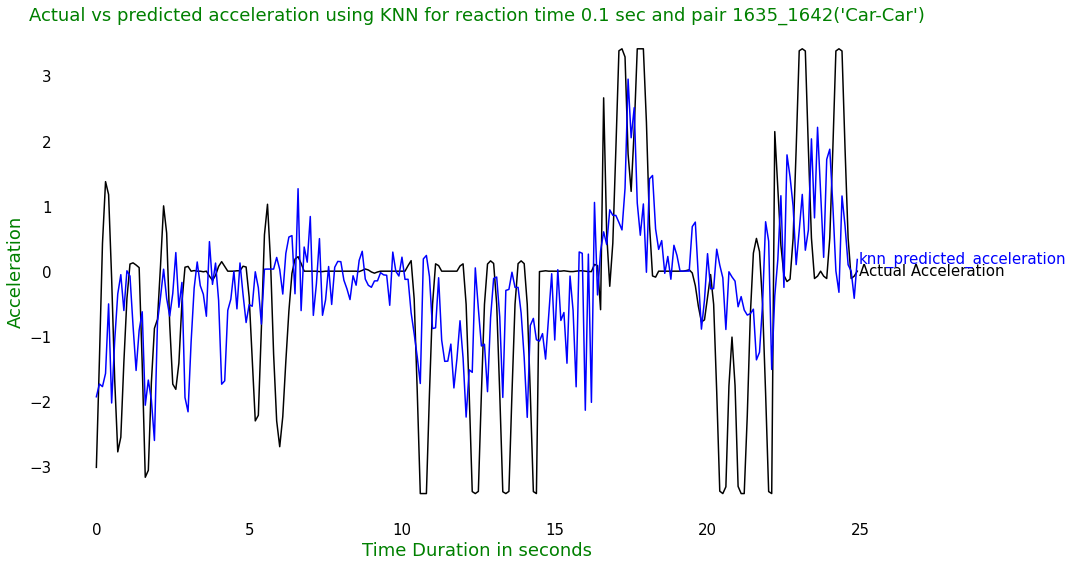

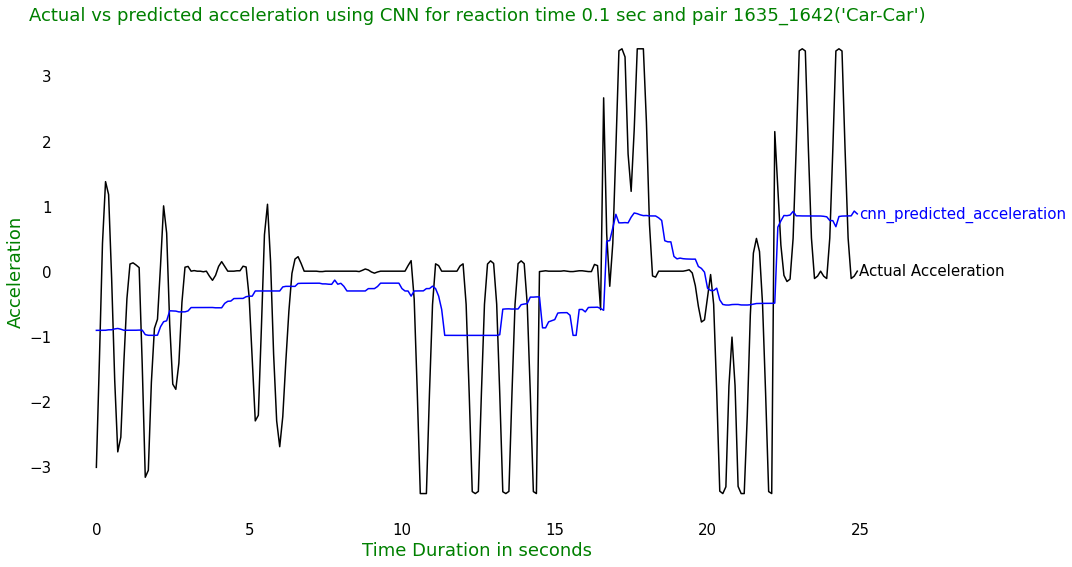

In [204]:
acceleration(LF1,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")
acceleration(LF1,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")
acceleration(LF1,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")

acceleration(LF9,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 2785_2804('Car-Heavy Vehicle')")
acceleration(LF9,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 2785_2804('Car-Heavy Vehicle')")
acceleration(LF9,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 2785_2804('Car-Heavy Vehicle')")

acceleration(LF7,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 2725_2717('Car-Heavy Vehicle')")
acceleration(LF7,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 2725_2717('Car-Heavy Vehicle')")
acceleration(LF7,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 2725_2717('Car-Heavy Vehicle')")

acceleration(LF2,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 551_560('Heavy Vehicle-Car')")
acceleration(LF2,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 551_560('Heavy Vehicle-Car')")
acceleration(LF2,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 551_560('Heavy Vehicle-Car')")

acceleration(LF4,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 3084_3094(Heavy Vehicle-Car')")
acceleration(LF4,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 3084_3094('Heavy Vehicle-Car')")
acceleration(LF4,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 3084_3094('Heavy Vehicle-Car')")

acceleration(LF6,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 2695_2725(Heavy Vehicle-Car')")
acceleration(LF6,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 2695_2725('Heavy Vehicle-Car')")
acceleration(LF6,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 2695_2725('Heavy Vehicle-Car')")

acceleration(LF3,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 1304_1309('Car-Car')")
acceleration(LF3,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 1304_1309('Car-Car')")
acceleration(LF3,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 1304_1309('Car-Car')")

acceleration(LF5,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 439_444('Car-Car')")
acceleration(LF5,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 439_444('Car-Car')")
acceleration(LF5,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 439_444('Car-Car')")

acceleration(LF8,"Actual Acceleration","rf_predicted_acceleration","Actual vs predicted acceleration using random forest for reaction time 0.1 sec and pair 1635_1642('Car-Car')")
acceleration(LF8,"Actual Acceleration","knn_predicted_acceleration","Actual vs predicted acceleration using KNN for reaction time 0.1 sec and pair 1635_1642('Car-Car')")
acceleration(LF8,"Actual Acceleration","cnn_predicted_acceleration","Actual vs predicted acceleration using CNN for reaction time 0.1 sec and pair 1635_1642('Car-Car')")

## Predicted jerk plots for reaction time 0.1 sec

In [205]:
def jerk(df,actual,prediction,title):
      #fig1, ax = plt.subplots()
      plt.figure(figsize=(15, 9))
      plt.title(title, color = "green", size = 18)
      plt.xlabel("Time Duration in seconds", color = "green", size = 18)
      plt.ylabel("Jerk", color = "green", size = 18)
      sns.lineplot(x = df["pair_Time_Duration"],y= df[actual],color="black")
      ax=sns.lineplot(x = df["pair_Time_Duration"],y= df[prediction],color="blue")

      for line, name in zip(ax.lines, df[[actual,prediction]].columns):
            y = line.get_ydata()[-1]
            ax.annotate(name, xy=(0.949, y), xytext=(6, 0),
                        color=line.get_color(), xycoords=ax.get_yaxis_transform(),
                        textcoords="offset points", size=15, va = "center")

      #ax.get_legend ().remove ()
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['left'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.tick_params(left = False, bottom = False)
      return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\neels\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

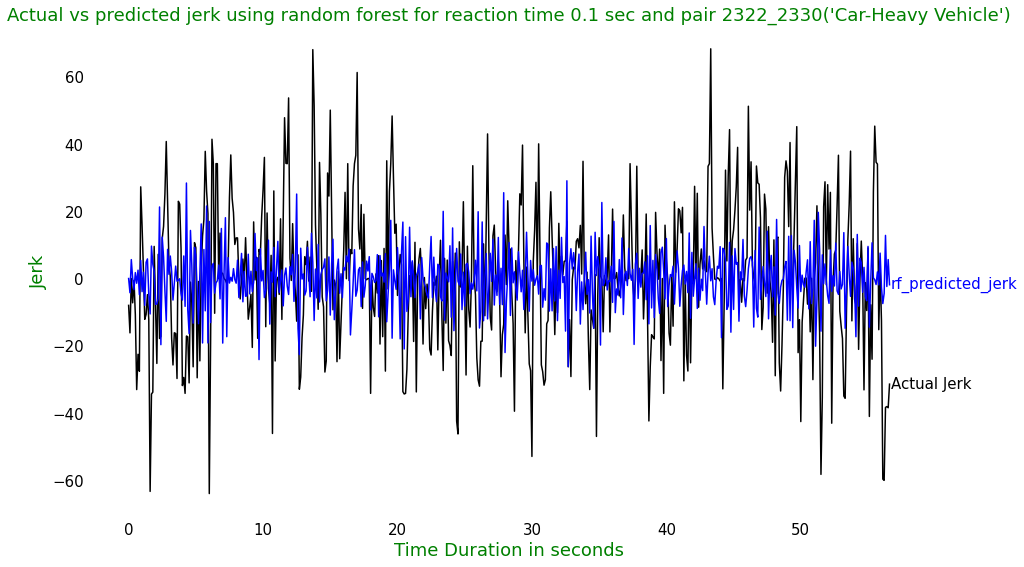

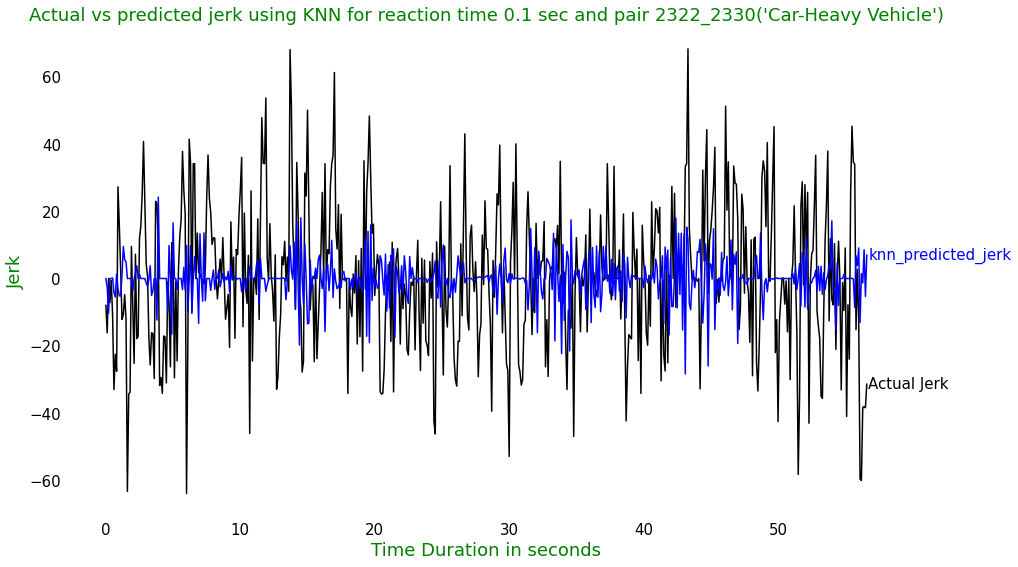

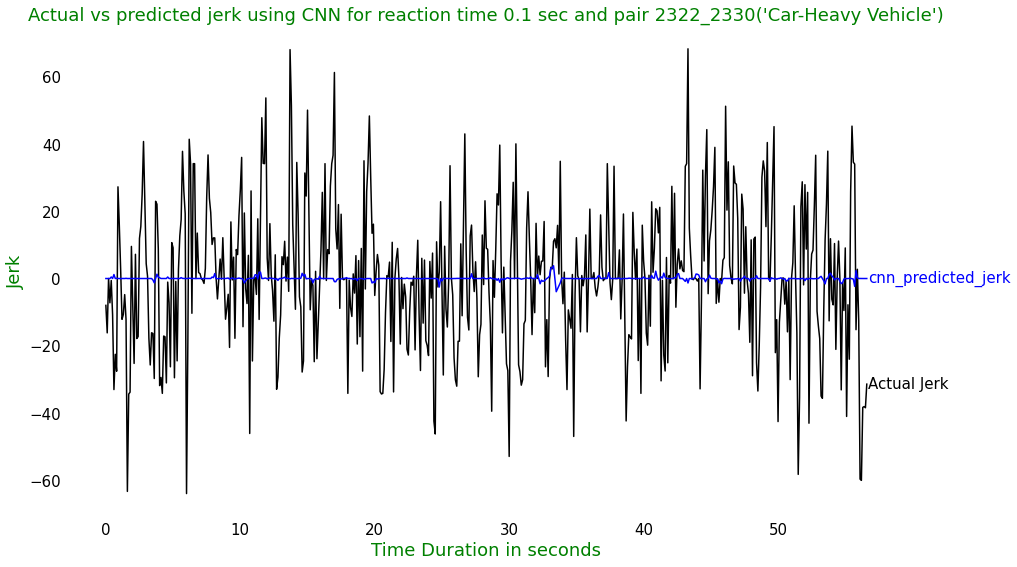

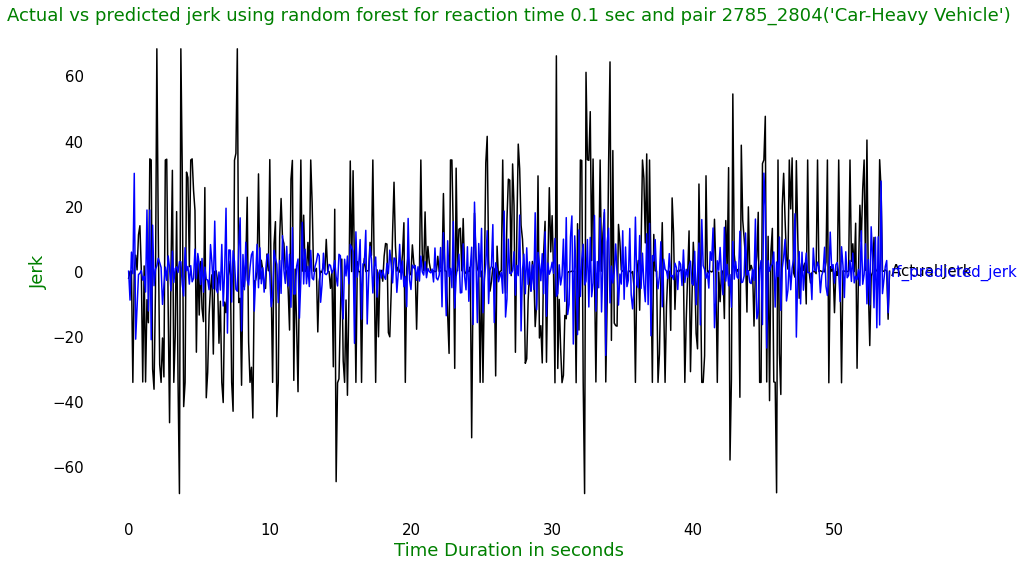

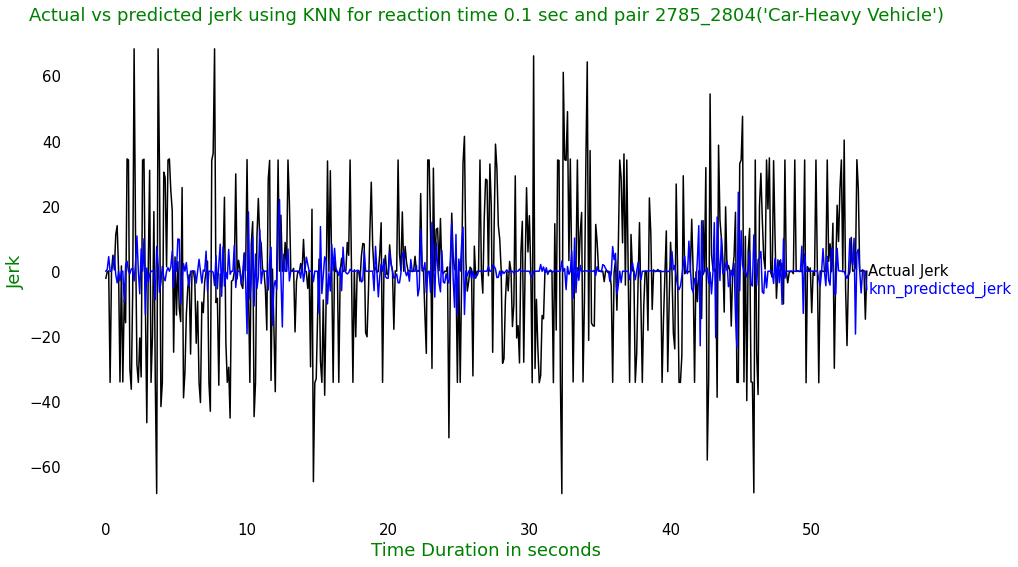

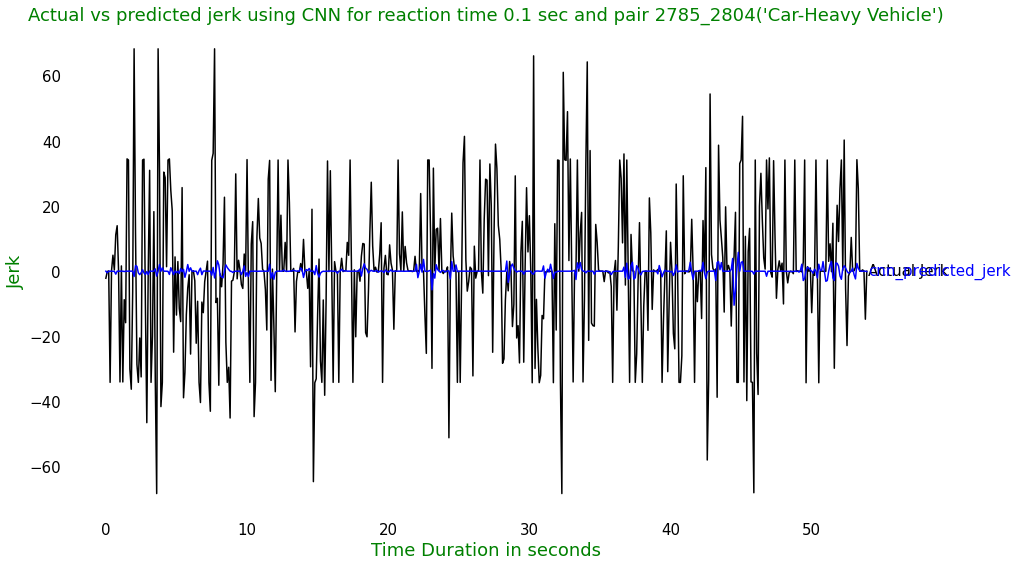

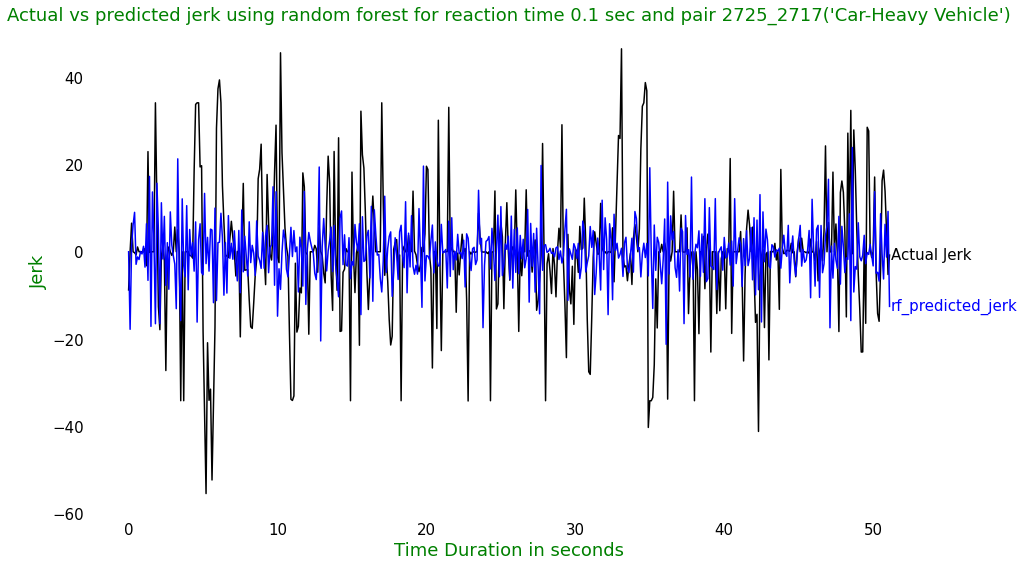

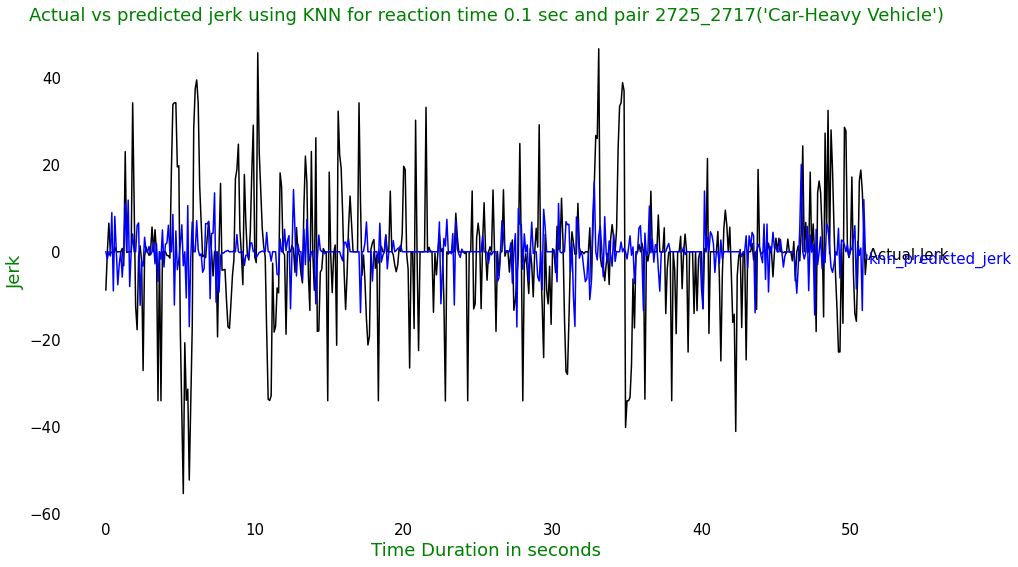

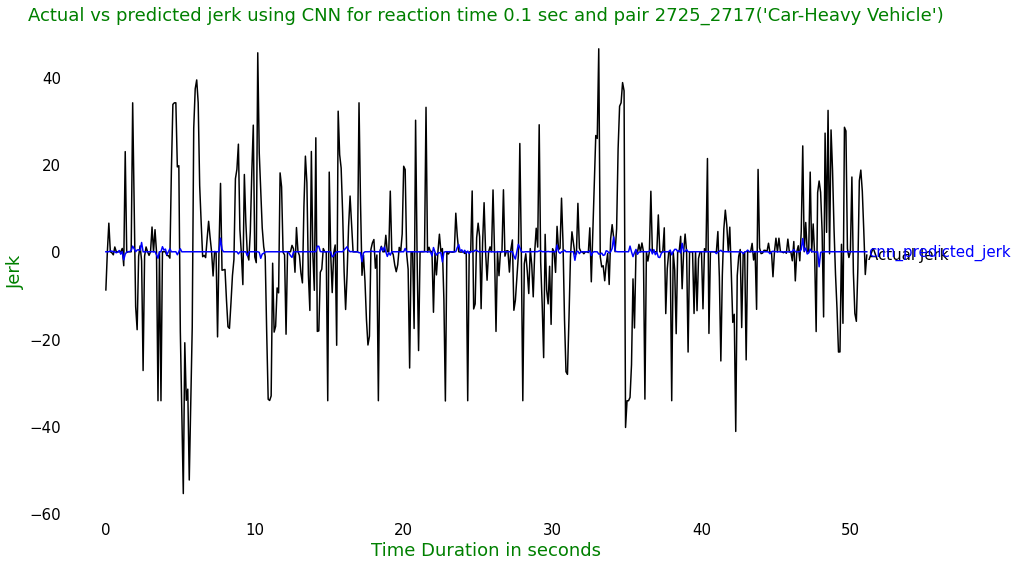

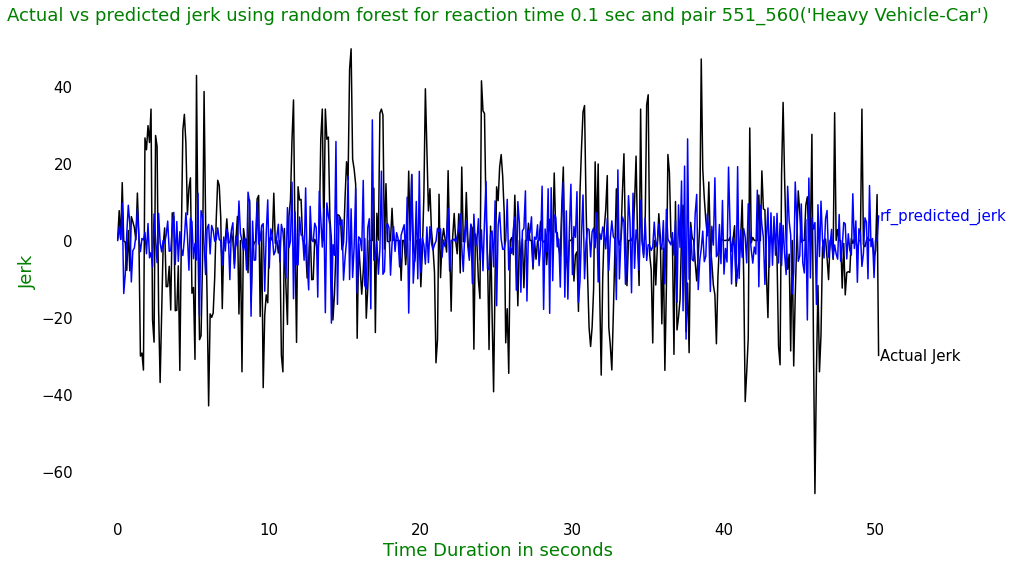

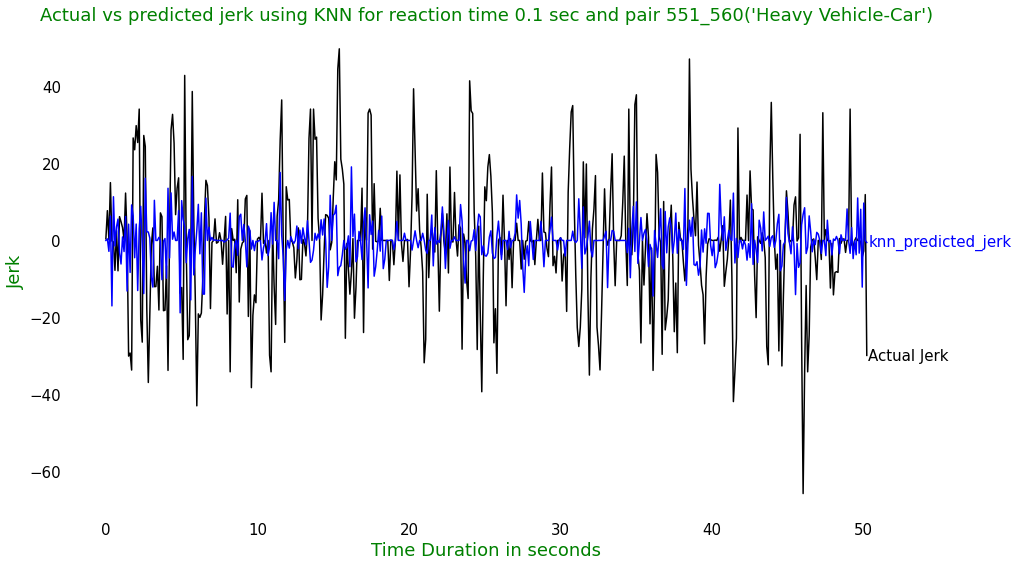

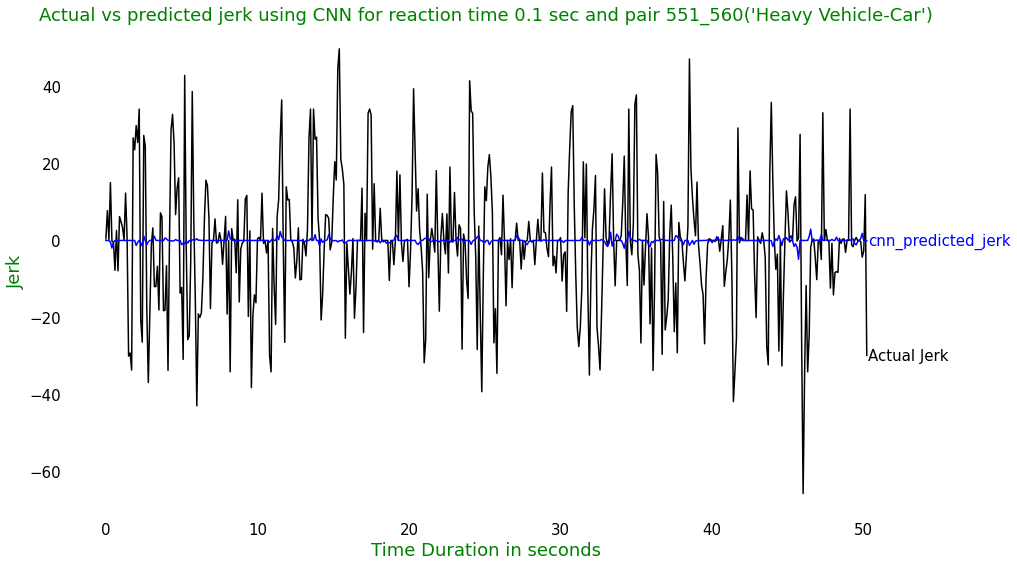

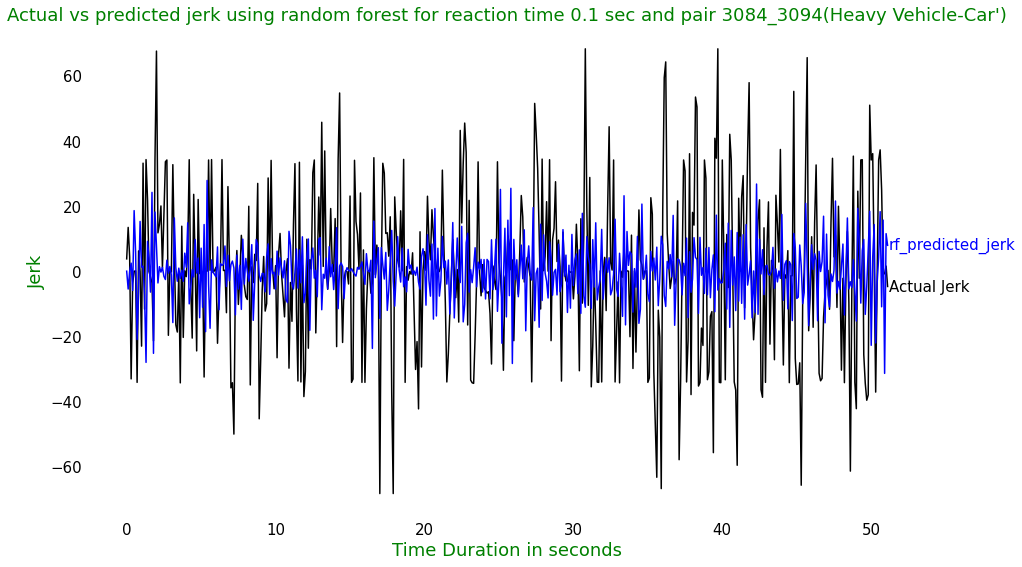

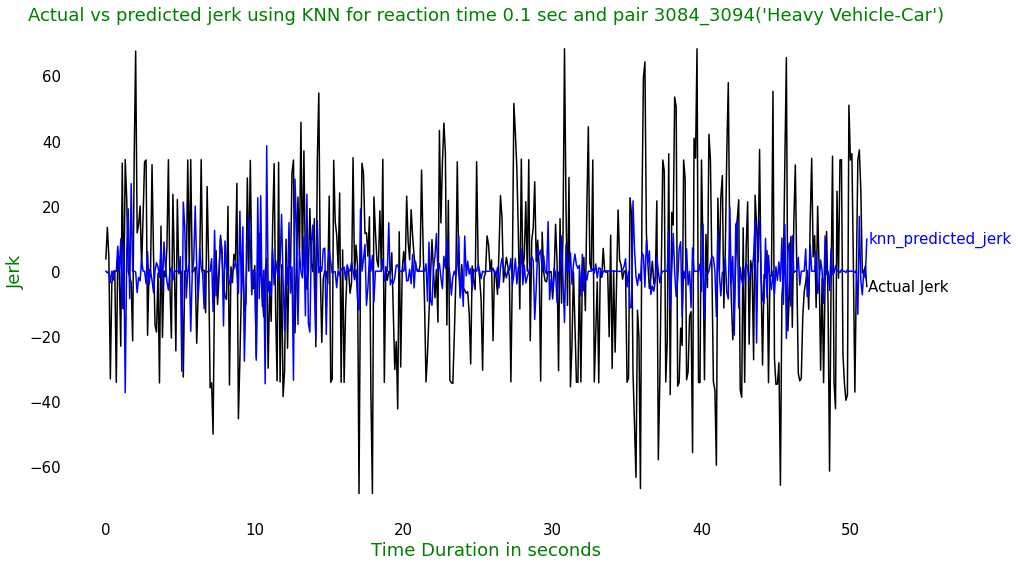

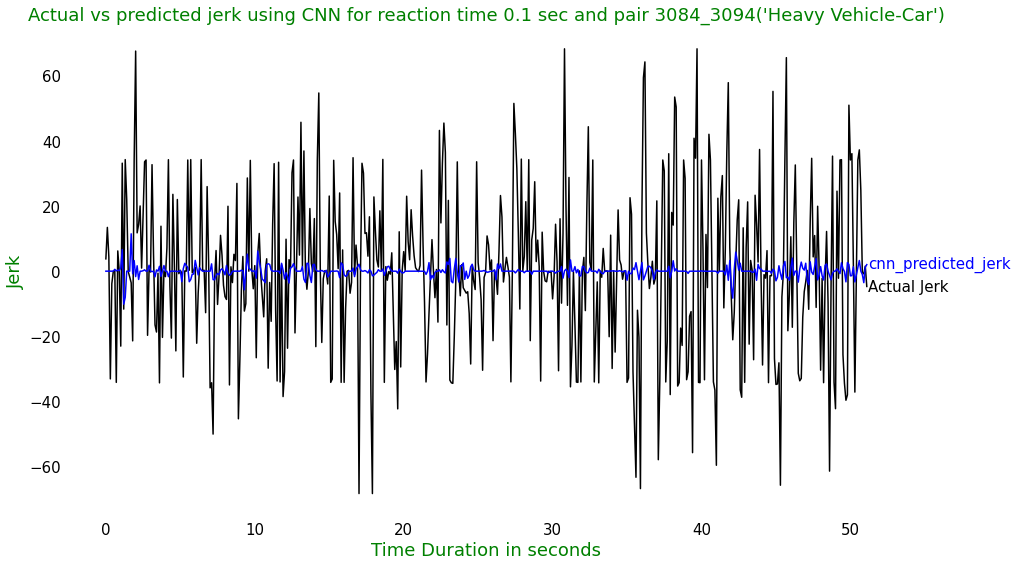

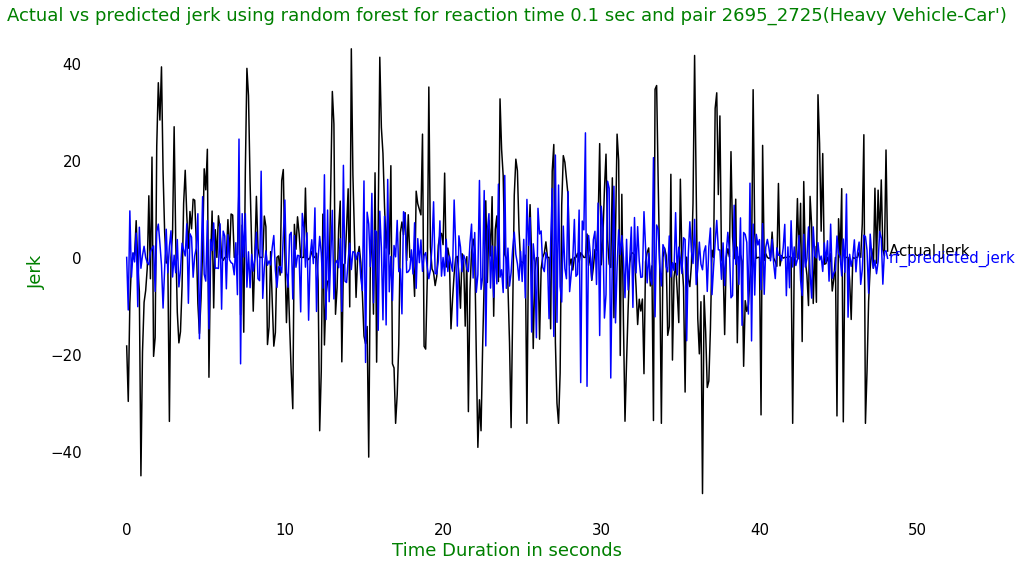

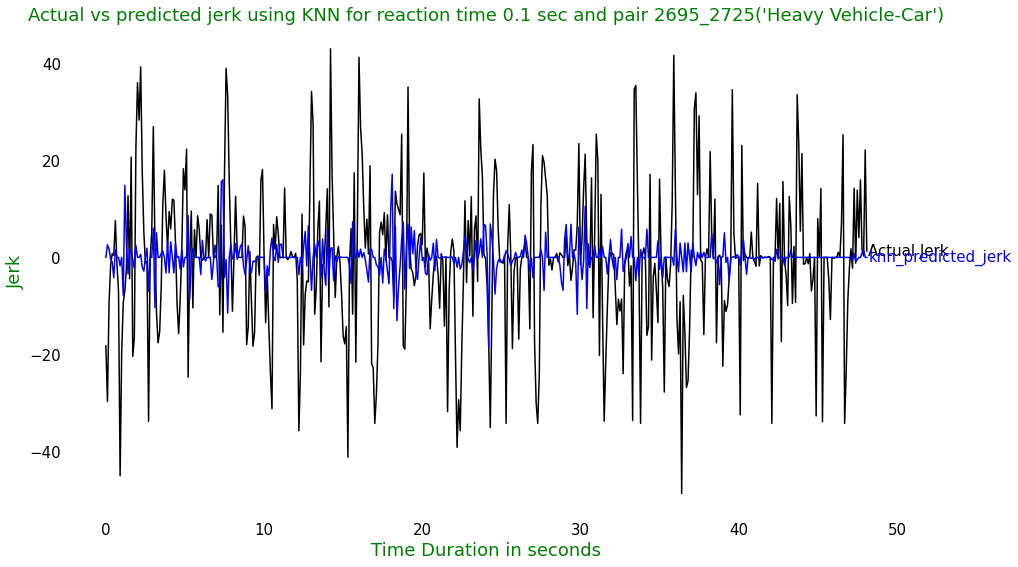

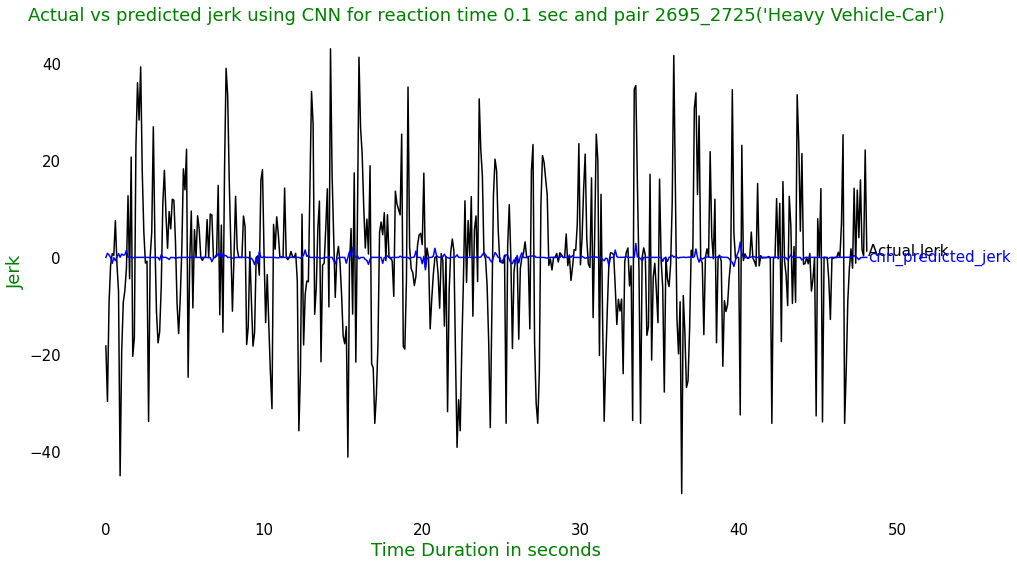

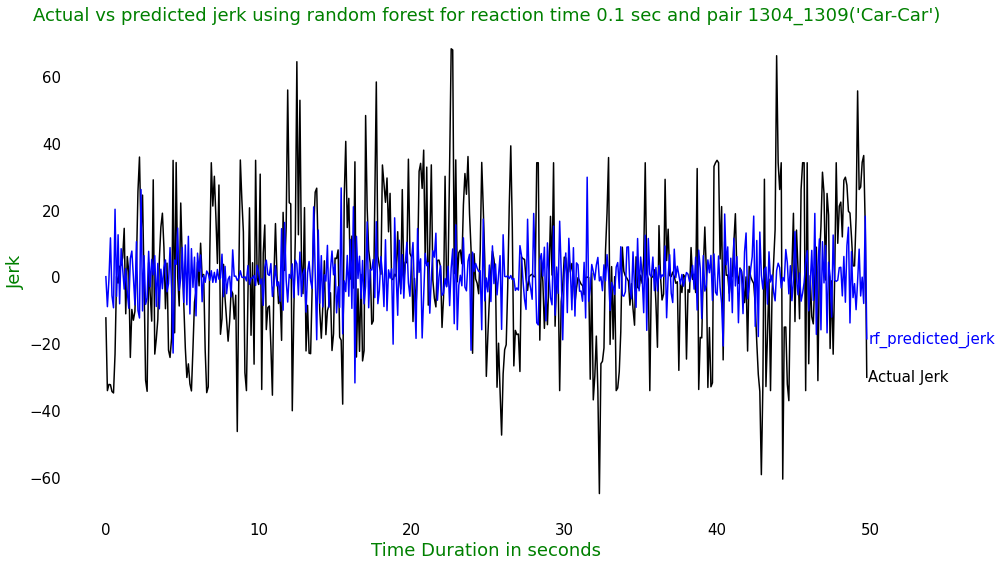

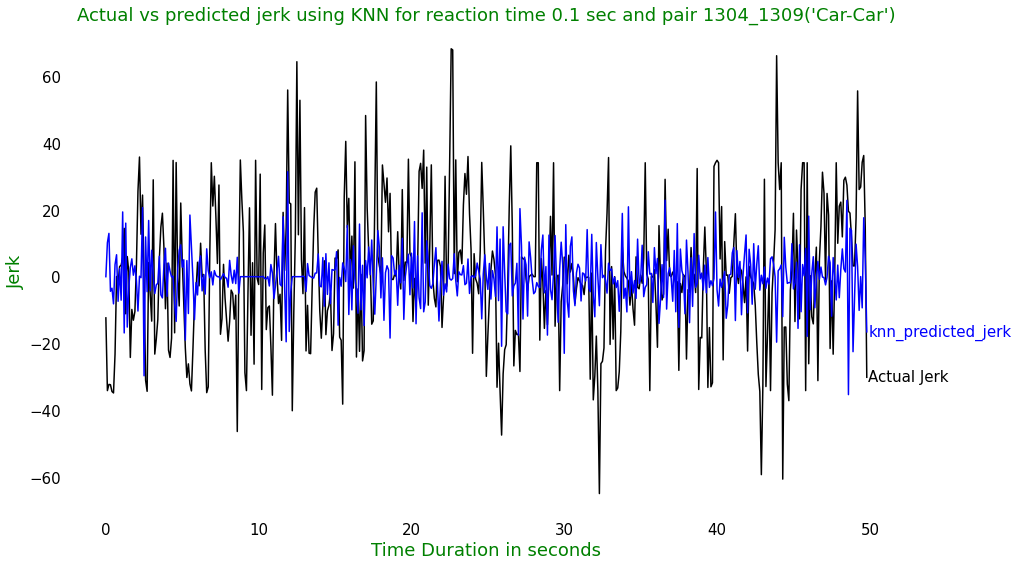

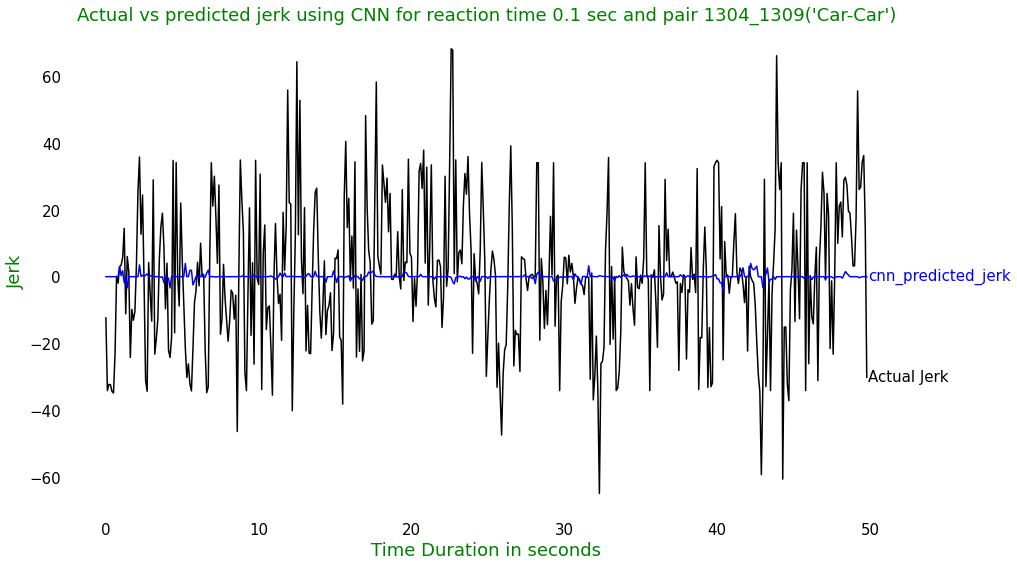

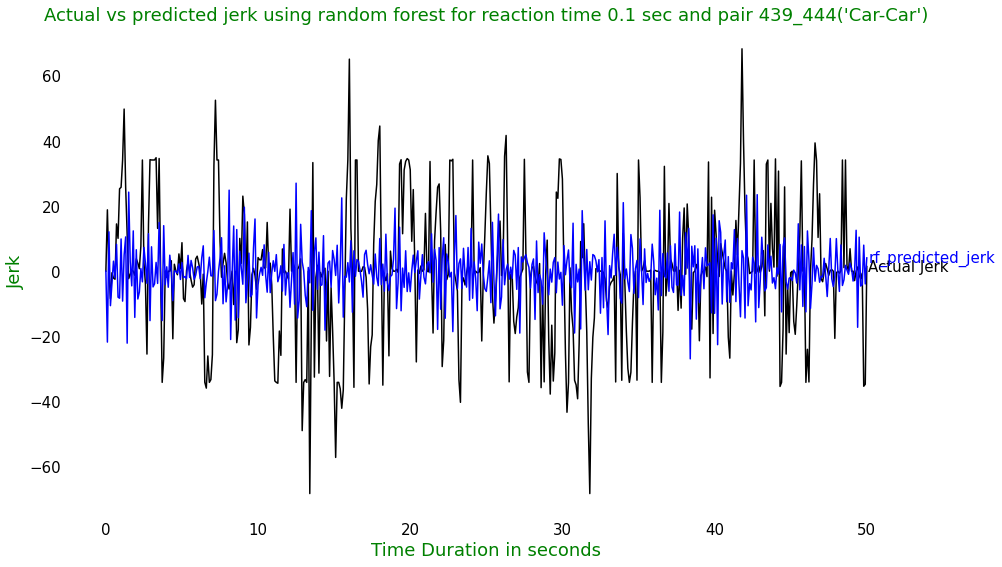

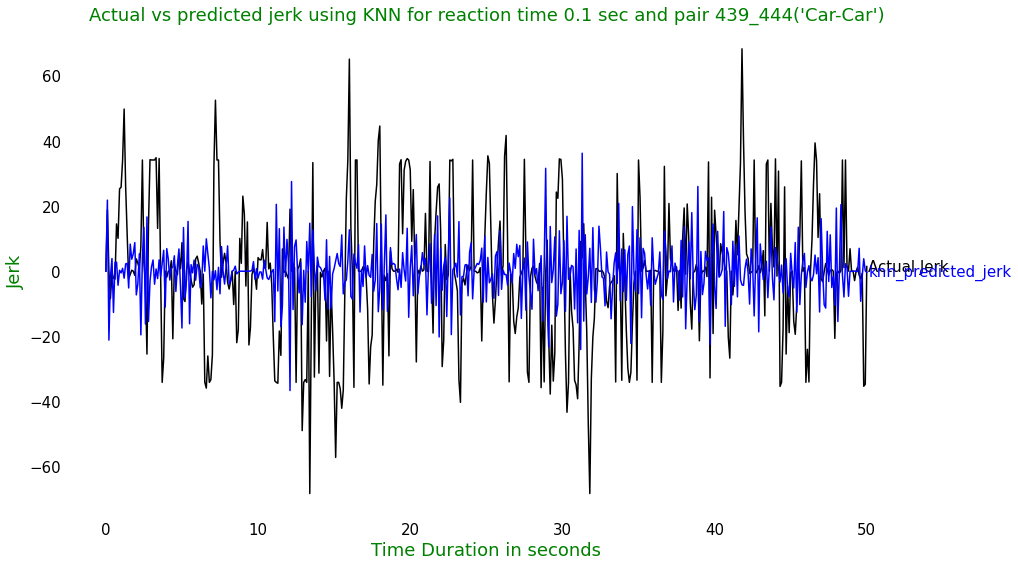

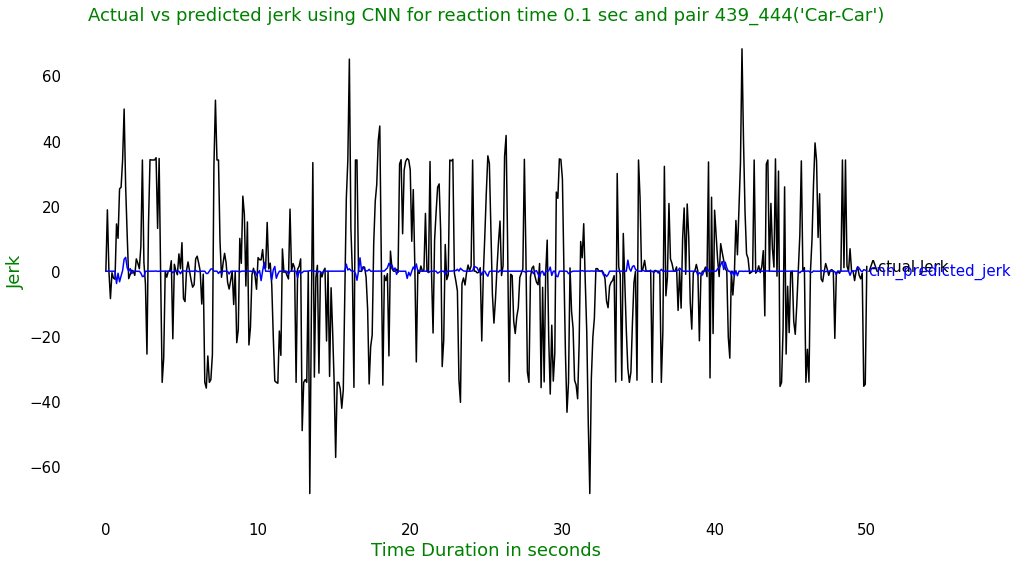

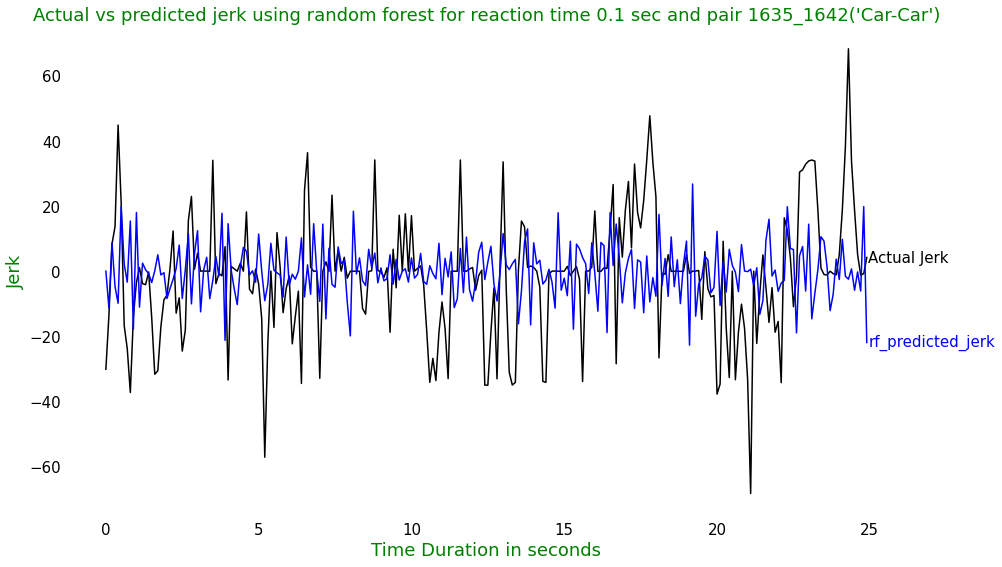

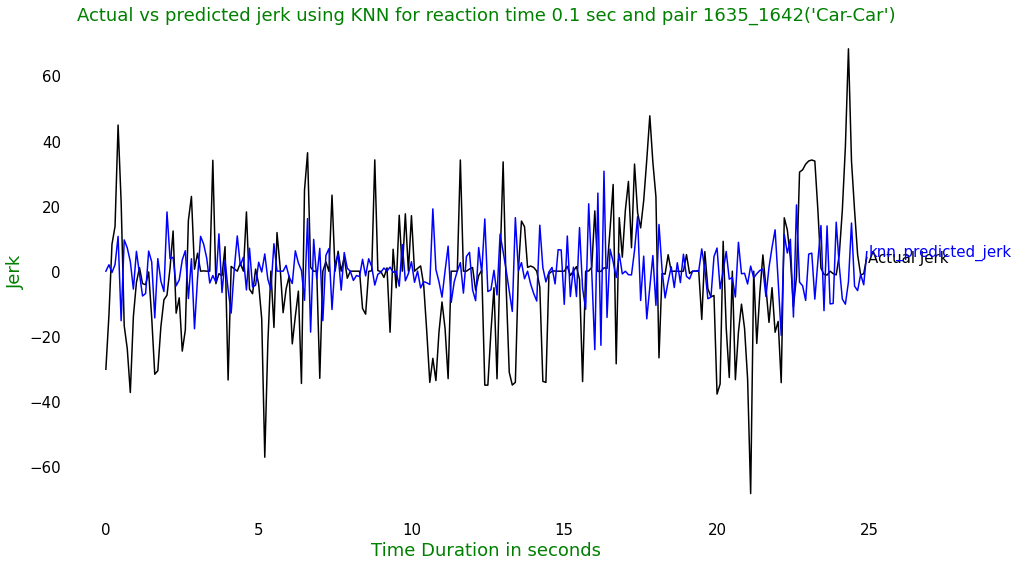

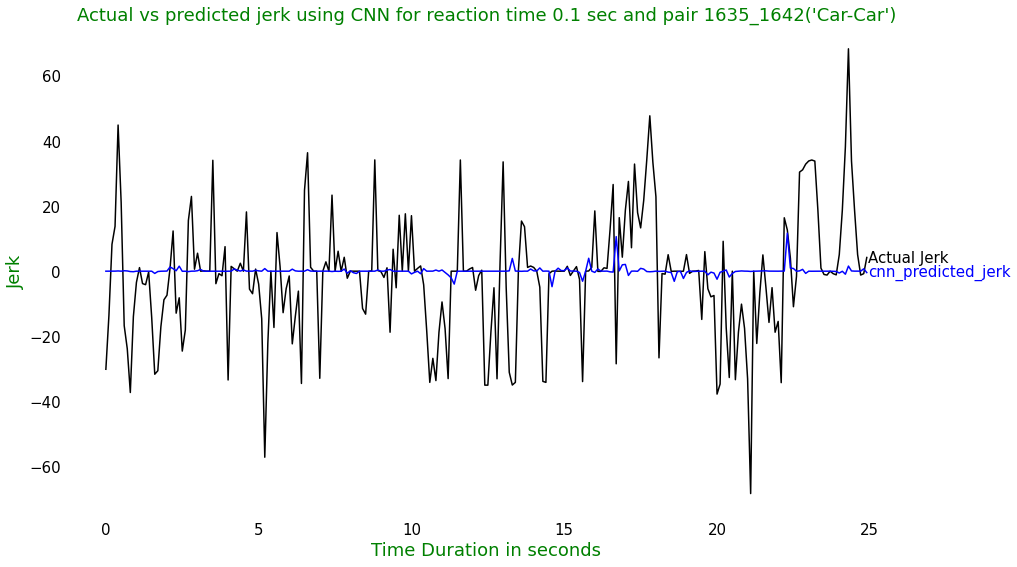

In [206]:
jerk(LF1,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")
jerk(LF1,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")
jerk(LF1,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 2322_2330('Car-Heavy Vehicle')")

jerk(LF9,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 2785_2804('Car-Heavy Vehicle')")
jerk(LF9,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 2785_2804('Car-Heavy Vehicle')")
jerk(LF9,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 2785_2804('Car-Heavy Vehicle')")

jerk(LF7,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 2725_2717('Car-Heavy Vehicle')")
jerk(LF7,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 2725_2717('Car-Heavy Vehicle')")
jerk(LF7,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 2725_2717('Car-Heavy Vehicle')")

jerk(LF2,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 551_560('Heavy Vehicle-Car')")
jerk(LF2,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 551_560('Heavy Vehicle-Car')")
jerk(LF2,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 551_560('Heavy Vehicle-Car')")

jerk(LF4,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 3084_3094(Heavy Vehicle-Car')")
jerk(LF4,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 3084_3094('Heavy Vehicle-Car')")
jerk(LF4,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 3084_3094('Heavy Vehicle-Car')")

jerk(LF6,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 2695_2725(Heavy Vehicle-Car')")
jerk(LF6,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 2695_2725('Heavy Vehicle-Car')")
jerk(LF6,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 2695_2725('Heavy Vehicle-Car')")

jerk(LF3,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 1304_1309('Car-Car')")
jerk(LF3,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 1304_1309('Car-Car')")
jerk(LF3,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 1304_1309('Car-Car')")

jerk(LF5,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 439_444('Car-Car')")
jerk(LF5,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 439_444('Car-Car')")
jerk(LF5,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 439_444('Car-Car')")

jerk(LF8,"Actual Jerk","rf_predicted_jerk","Actual vs predicted jerk using random forest for reaction time 0.1 sec and pair 1635_1642('Car-Car')")
jerk(LF8,"Actual Jerk","knn_predicted_jerk","Actual vs predicted jerk using KNN for reaction time 0.1 sec and pair 1635_1642('Car-Car')")
jerk(LF8,"Actual Jerk","cnn_predicted_jerk","Actual vs predicted jerk using CNN for reaction time 0.1 sec and pair 1635_1642('Car-Car')")